In [1]:
import torch
import kagglehub
import os


# Loads all Kaggle Files

In [2]:
path_waifer = kagglehub.dataset_download("qingyi/wm811k-wafer-map")
path2_secom = kagglehub.dataset_download("paresh2047/uci-semcom")


print("Path to dataset files:", path_waifer)

print("Path to dataset files:", path2_secom)

100%|██████████| 149M/149M [00:01<00:00, 84.0MB/s]

Extracting files...


100%|██████████| 2.03M/2.03M [00:00<00:00, 55.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/paresh2047/uci-semcom/versions/1


# This tile will print out the directotirs of each kaggle datset

In [3]:
contents_of_base_folder = os.listdir()  # lists current working directory contents that are hidden and are in the window library
contents_of_wafer_map = os.listdir(path_waifer) # checks what is inside the current kaggle wm811k-wafer-map datset
contents_of_secom = os.listdir(path2_secom) # checks what is inside the current kaggle uci-semcom datset

print("Current directory contents:", contents_of_base_folder)
print(" Waifer wm811l data set contains", contents_of_wafer_map)
print("Secom data set contains", contents_of_secom)

Current directory contents: ['.config', 'sample_data']
 Waifer wm811l data set contains ['LSWMD.pkl']
Secom data set contains ['uci-secom.csv']


In [4]:
import sys
import pickle
import pandas as pd
import pandas.core.indexes as indexes
import numpy as np # Import numpy
import os


#patch the missing module
sys.modules['pandas.indexes'] = indexes

# Construct path
pickle_file_path = os.path.join(path_waifer, "LSWMD.pkl")

# Load the pickle safely
with open(pickle_file_path, "rb") as f: # this will load the file as a read bianry file as this fileis is in binary
    data = pickle.load(f, encoding='latin-1') # this loads the file into variable " data " that we use later



# Modify the lambda function to handle empty lists/arrays
failure_labels = data['failureType'].apply(
    lambda x: x[0][0] if isinstance(x, np.ndarray) and len(x) > 0 and len(x[0]) > 0 else (x if isinstance(x, str) else 'none')
)
print(failure_labels.unique())


print(type(data))  # Should be <class 'pandas.DataFrame'>
print("Number of records:", len(data))
print("Available columns:", data.columns.tolist())




print(data.head()) # this will print the top 5 parameters of the wafer datset

[np.str_('none') np.str_('Loc') np.str_('Edge-Loc') np.str_('Center')
 np.str_('Edge-Ring') np.str_('Scratch') np.str_('Random')
 np.str_('Near-full') np.str_('Donut')]
<class 'pandas.core.frame.DataFrame'>
Number of records: 811457
Available columns: ['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel', 'failureType']
                                            waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.

In [5]:
import pandas as pd
import os

# The SECOM data was downloaded as 'uci-secom.csv' and its path is stored in path2_secom
# Use the correct file path instead of 'secom_data.txt'
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
secom_data = pd.read_csv(secom_file_path)


print("The length of the file is ", len(secom_data))
print("Headers:", list(secom_data.columns)) # the heaers are numbeered and end have a pass/fail
# each header has hundredereds of sensors as we can see here


print(secom_data.head())

The length of the file is  1567
Headers: ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

# Thsi is to display the data of waifer data set in a old pandas format as the pkl file is old and in binary

This will show you the names of files and subdirectories within the dataset. To see the images, you'll likely need to navigate into any subdirectories that appear and then use image loading libraries like PIL or OpenCV to open and display them.

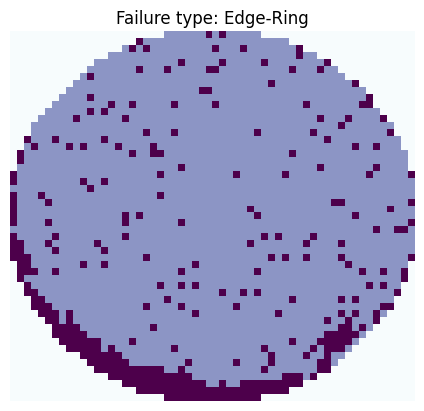

In [6]:
import matplotlib.pyplot as plt

# Pick one wafer (e.g., index 0)
wafer = data.iloc[100]['waferMap']
label = data.iloc[100]['failureType'][0][0]

plt.imshow(wafer, cmap='BuPu')   # Render as grayscale
plt.title(f"Failure type: {label}")
plt.axis("off")
plt.show()


In [7]:
unique_failure_types = failure_labels.unique()

print("Unique failure types:")
for label in unique_failure_types:
    print("-", label)

Unique failure types:
- none
- Loc
- Edge-Loc
- Center
- Edge-Ring
- Scratch
- Random
- Near-full
- Donut


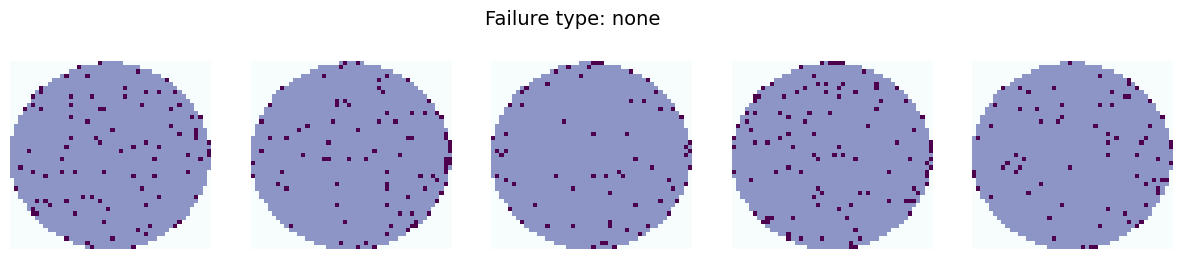

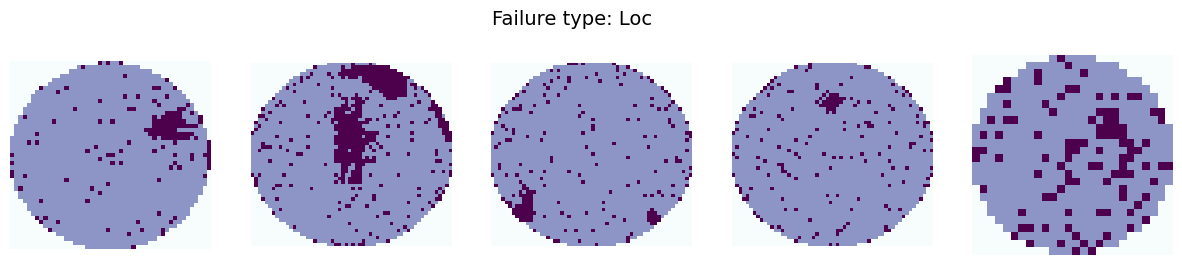

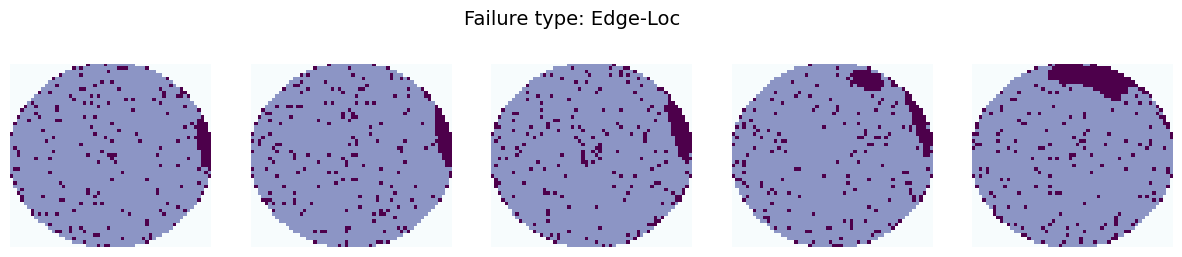

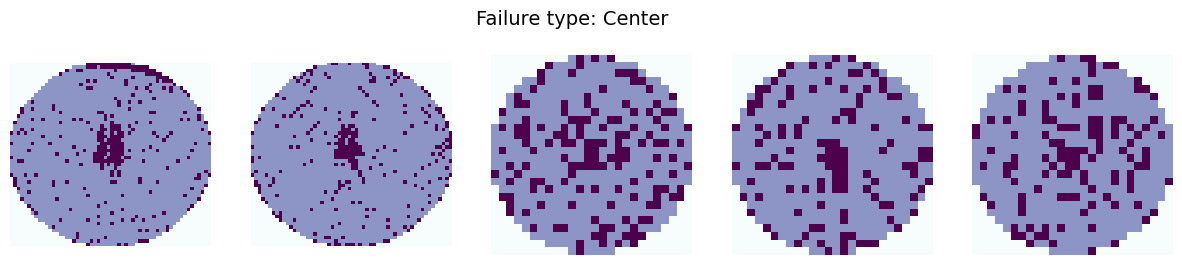

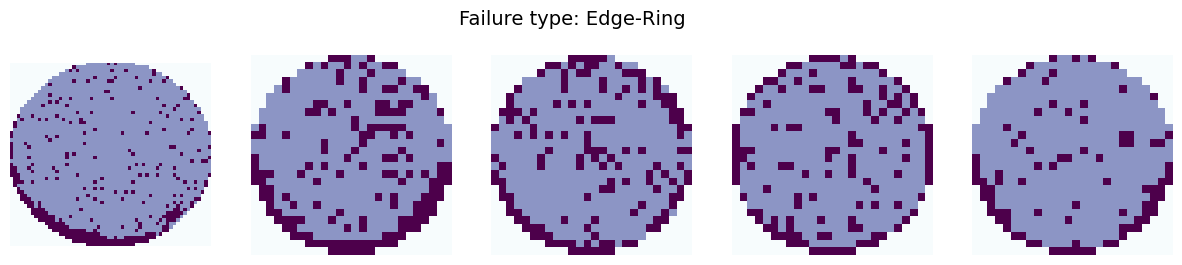

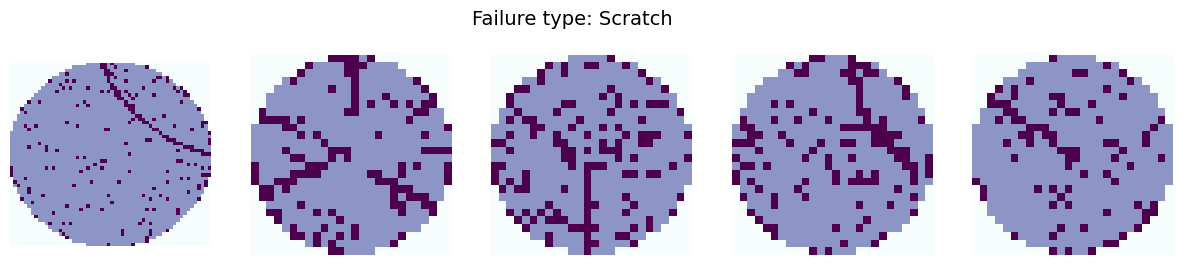

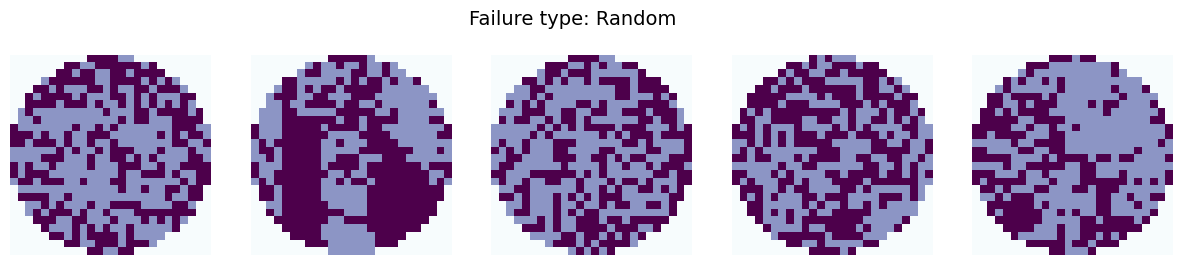

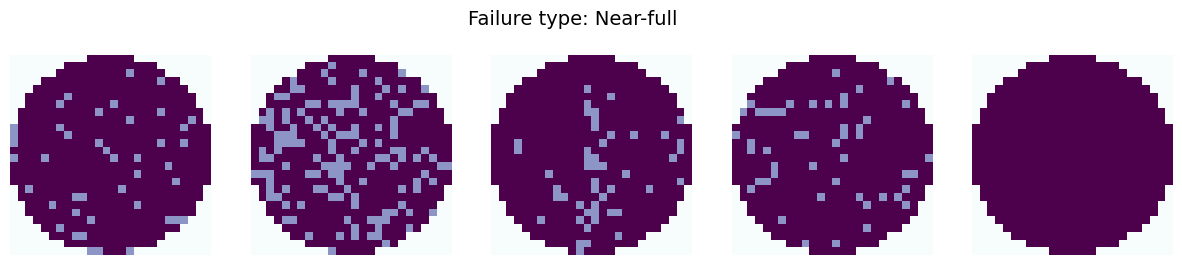

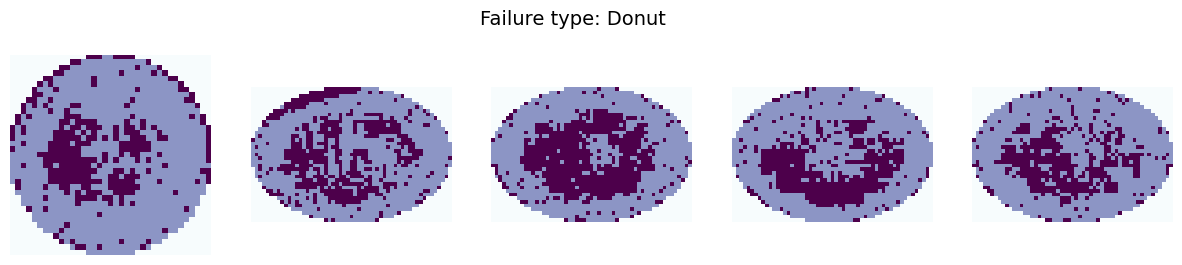

In [8]:
import matplotlib.pyplot as plt



for label in unique_failure_types:
    # Filter rows for this label
    subset = data[failure_labels == label]

    # Pick up to 5 samples
    num_samples = min(len(subset), 5)

    if num_samples == 0:
        continue

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f"Failure type: {label}", fontsize=14)

    # Ensure axes is iterable (even if 1 sample)
    if num_samples == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        wafer = np.array(subset.iloc[i]['waferMap'])
        ax.imshow(wafer, cmap="BuPu")
        ax.axis("off")

    plt.show()

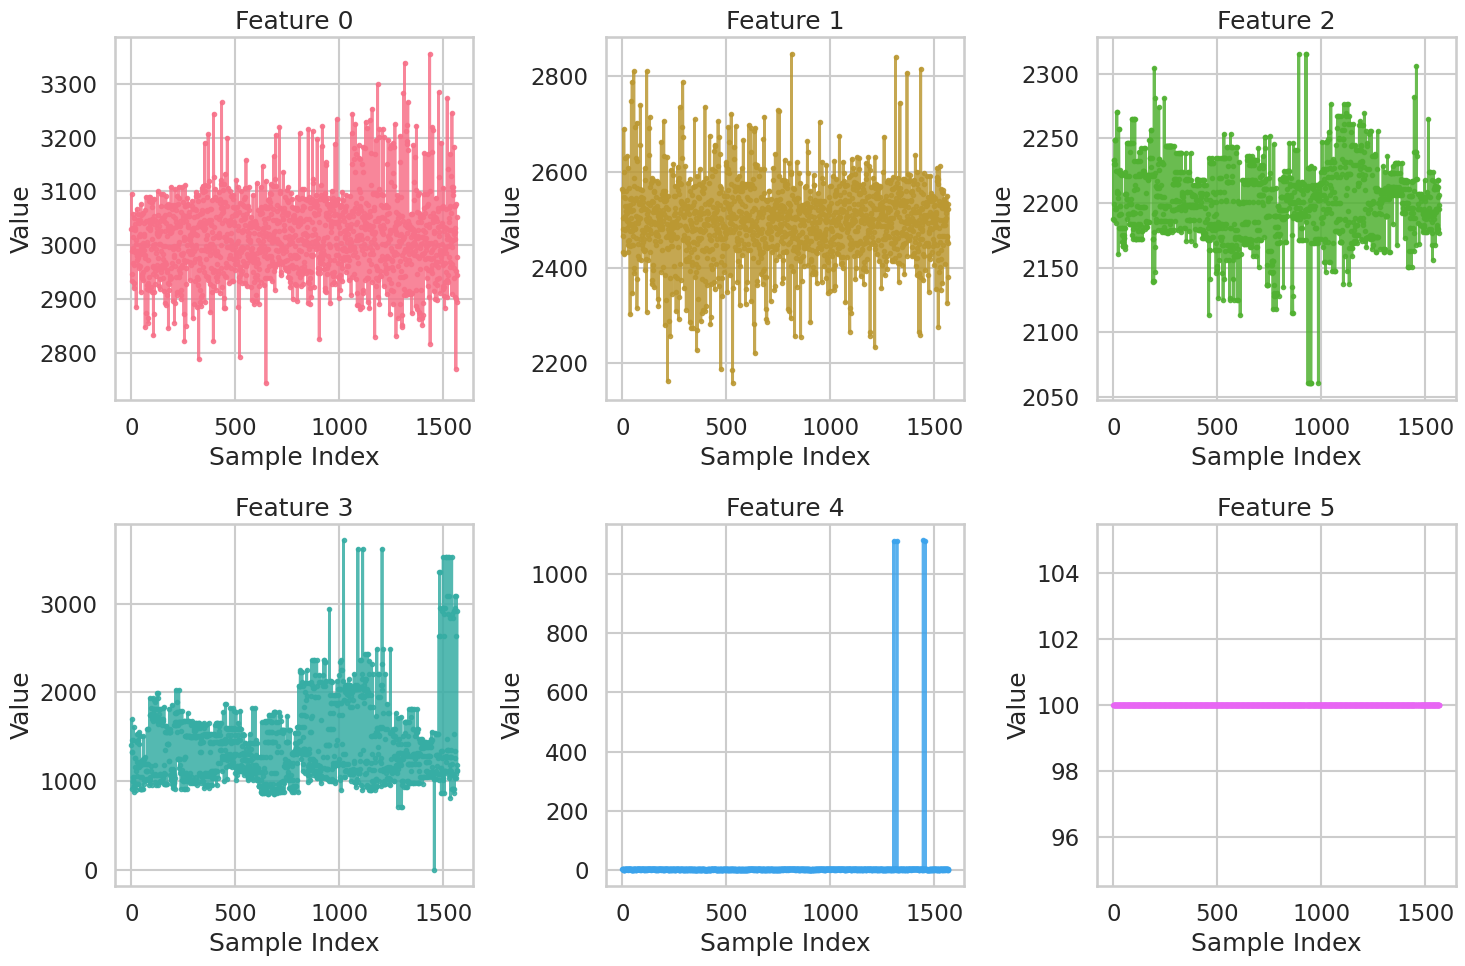

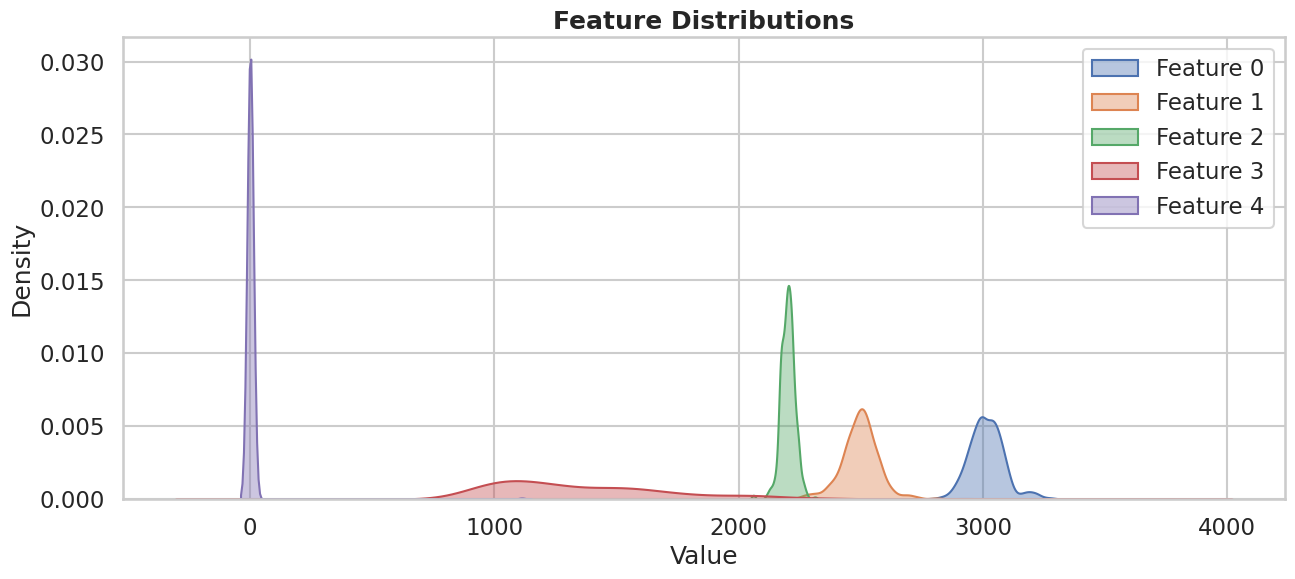

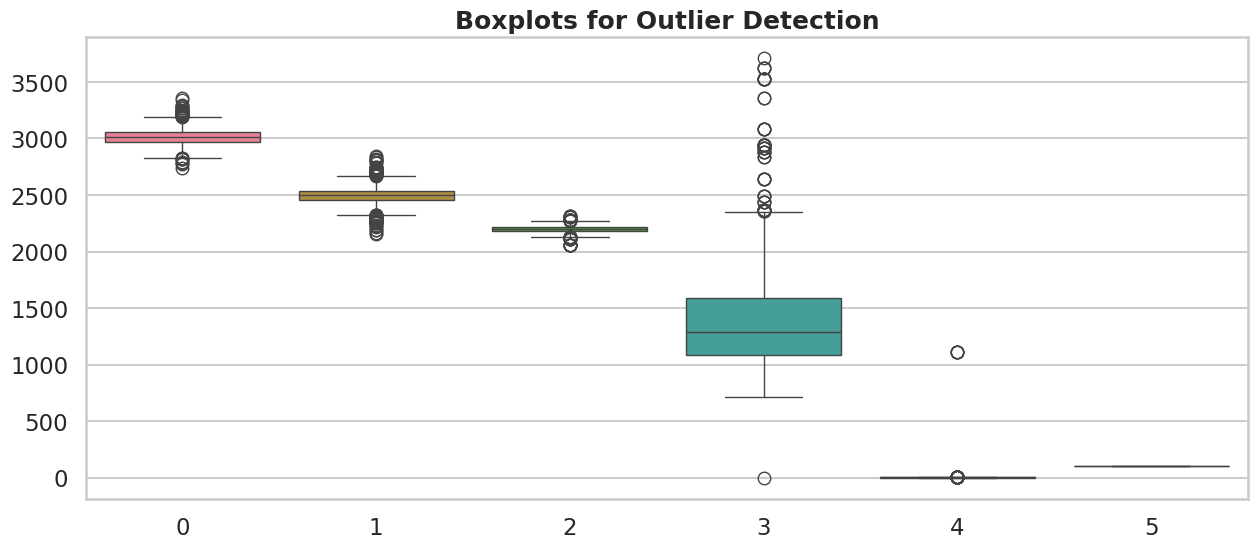

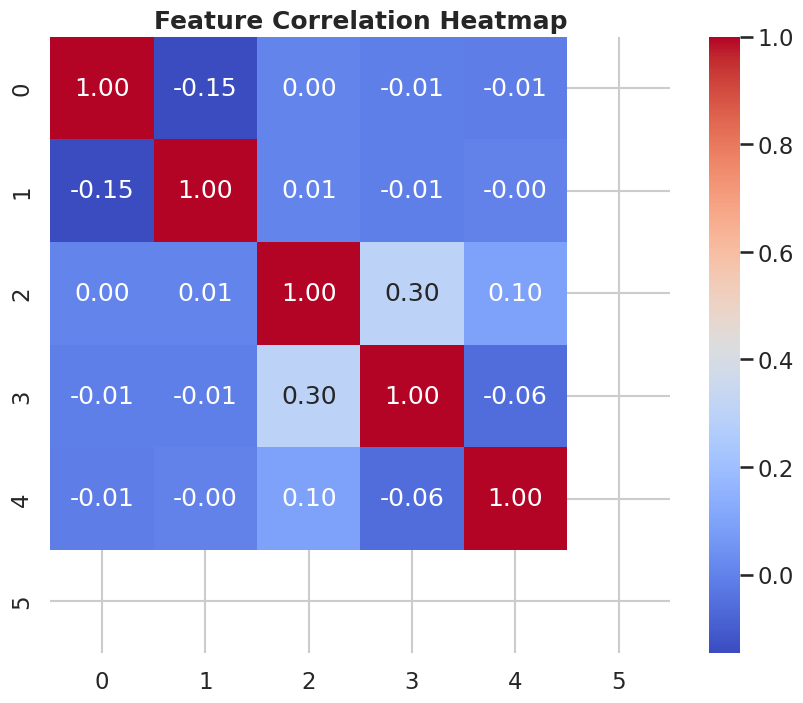

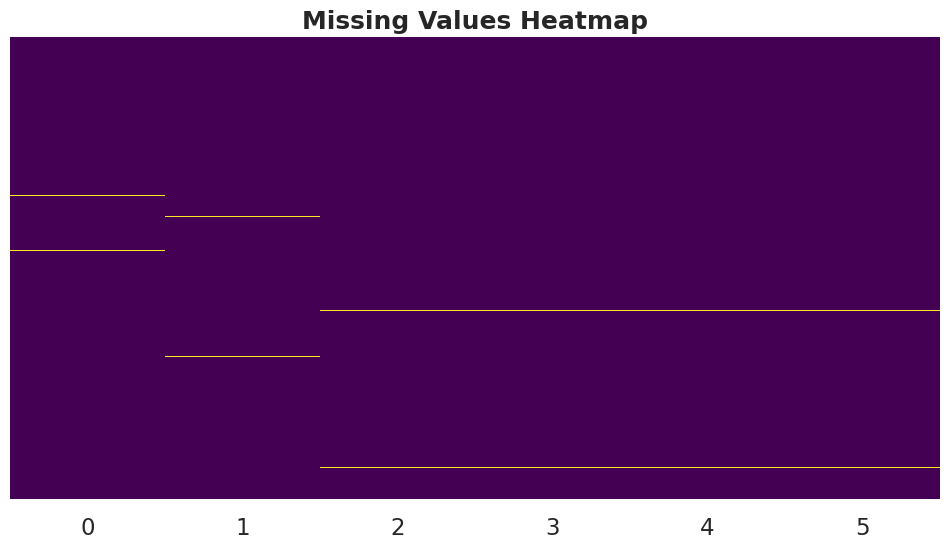

In [27]:
def secom_visualizations(data, columns=None, figsize=(15, 10)):
    """Multiple SECOM dataset visualizations"""
    sns.set_theme(style="whitegrid", context="talk")

    if columns is None:
        columns = data.columns[:6]  # limit for clarity

    # 1️⃣ Line Plots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.ravel()
    palette = sns.color_palette("husl", len(columns))
    for i, col in enumerate(columns):
        axes[i].plot(
            data[col],
            color=palette[i % len(palette)],
            linewidth=2,
            marker='o',
            markersize=3,
            alpha=0.85
        )
        axes[i].set_title(f"Feature {col}")
        axes[i].set_xlabel("Sample Index")
        axes[i].set_ylabel("Value")
    plt.tight_layout()
    plt.show()

    # 2️⃣ Histogram + KDE
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(columns):
        sns.kdeplot(data[col], fill=True, alpha=0.4, label=f"Feature {col}")
    plt.title("Feature Distributions", fontsize=18, fontweight='bold')
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # 3️⃣ Boxplots
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=data[columns], palette="husl")
    plt.title("Boxplots for Outlier Detection", fontsize=18, fontweight='bold')
    plt.show()

    # 4️⃣ Correlation Heatmap
    plt.figure(figsize=(10, 8))
    corr = data[columns].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Feature Correlation Heatmap", fontsize=18, fontweight='bold')
    plt.show()

    # 5️⃣ Missing Values Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(data[columns].isnull(), cbar=False, yticklabels=False, cmap="viridis")
    plt.title("Missing Values Heatmap", fontsize=18, fontweight='bold')
    plt.show()

# Example usage
secom_visualizations(secom_data, ['0', '1', '2', '3', '4', '5'])


In [10]:
import pandas as pd
import os

# The SECOM data was downloaded as 'uci-secom.csv' and its path is stored in path2_secom
# Use the correct file path instead of 'secom_data.txt'
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
output_file = 'secom_data_processed.csv' # Changed output filename to avoid confusion

# Read the data from the correct path, it's already in CSV format
# No need for delim_whitespace as it's a standard CSV
df = pd.read_csv(secom_file_path)

# Save as CSV with commas - this step seems redundant if the input is already CSV,
# but we'll keep it if you intended to perform some transformations here later.
# If not, this save step can be removed.
df.to_csv(output_file, index=False)

print(f"Read data from {secom_file_path}")
print(f"Saved a copy as {output_file}")

Read data from /root/.cache/kagglehub/datasets/paresh2047/uci-semcom/versions/1/uci-secom.csv
Saved a copy as secom_data_processed.csv


In [11]:
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
secom_data = pd.read_csv(secom_file_path)


print("The length of the file is ", len(secom_data))
print("Headers:", list(secom_data.columns)) # the heaers are numbeered and end have a pass/fail
# each header has hundredereds of sensors as we can see here


print(secom_data.head())

The length of the file is  1567
Headers: ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

# This processes the SECOM dataset and replace all NaN values and Removes the time Stamp

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Use your existing secom_data variable (no file loading needed!)
print(f"Working with existing data shape: {secom_data.shape}")

# Step 1: Handle target variable properly
if 'Pass/Fail' in secom_data.columns:
    unique_vals = secom_data['Pass/Fail'].unique()

    if set(unique_vals) <= {'Pass', 'Fail'}:
        # Case: textual labels
        target = secom_data['Pass/Fail'].map({'Pass': 0, 'Fail': 1})  # Fixed: Pass=0, Fail=1
    else:
        # Case: already numeric (SECOM format: -1=Pass, 1=Fail)
        target = pd.to_numeric(secom_data['Pass/Fail'], errors='coerce')
        target = target.map({-1: 0, 1: 1})  # Convert to 0=Pass, 1=Fail

    features = secom_data.drop(columns=['Pass/Fail'])
else:
    features = secom_data.copy()
    target = None

print(f"Target unique values: {secom_data['Pass/Fail'].unique()}")
print(f"Target distribution:\n{pd.Series(target).value_counts()}")

# Step 2: Remove time column
if 'Time' in features.columns:
    features = features.drop(columns=['Time'])
    print(f"Dropped Time column. New shape: {features.shape}")

# Step 3: Select numeric columns only
features = features.select_dtypes(include=[np.number])
print(f"After selecting numeric columns: {features.shape}")
print(f"NaN values before imputation: {features.isnull().sum().sum()}")



# Step 4: Smart median imputation
def smart_median_imputation(features):
    """Enhanced median imputation for manufacturing sensor data"""

    print("Computing correlations for smart imputation")
    # Group sensors by correlation for smarter imputation
    correlation_matrix = features.corr().abs()

    imputed_features = features.copy()
    columns_with_nan = features.columns[features.isnull().any()].tolist()

    print(f"Imputing {len(columns_with_nan)} columns with missing values...")

    for column in columns_with_nan:
        if features[column].isnull().sum() > 0:
            # Find most correlated sensors
            correlations = correlation_matrix[column].sort_values(ascending=False)
            similar_sensors = correlations.index[1:11]  # Top 10  similar sensors

            # Use median of similar sensors if available
            median_used = False
            for similar_sensor in similar_sensors:
                if not features[similar_sensor].isnull().all():
                    median_val = features[similar_sensor].median()
                    imputed_features[column].fillna(median_val, inplace=True)
                    median_used = True
                    break

            # Fallback to overall median
            if not median_used:
                imputed_features[column].fillna(features[column].median(), inplace=True)

    return imputed_features

# Apply smart imputation
features_imputed = smart_median_imputation(features)  # Fixed variable name

# Step 5: Verify imputation worked
print(f"NaN values after imputation: {features_imputed.isnull().sum().sum()}")

# Step 6: Remove constant columns
print("\nRemoving constant columns...")
feature_std = features_imputed.std()
constant_columns = feature_std[feature_std < 1e-8].index
features_filtered = features_imputed.drop(columns=constant_columns)

print(f"Removed {len(constant_columns)} constant columns")
print(f"Final features shape: {features_filtered.shape}")

# Step 7: Standardization
print("\nApplying StandardScaler")
scaler = StandardScaler()
secom_scaled_data = scaler.fit_transform(features_filtered)

# Convert back to DataFrame
secom_scaled_df = pd.DataFrame(
    secom_scaled_data,
    columns=features_filtered.columns,
    index=features_filtered.index
)


# Step 8: Final validation
print("\n=== FINAL PREPROCESSING RESULTS ===")
print(f"Standardization - Mean: {secom_scaled_data.mean():.6f}, Std: {secom_scaled_data.std():.6f}")
print(f"Data range: [{secom_scaled_data.min():.2f}, {secom_scaled_data.max():.2f}]")
print(f"Final data shape: {secom_scaled_df.shape}")
print(f"Target shape: {target.shape if target is not None else 'None'}")

# Check success
if abs(secom_scaled_data.mean()) < 0.01 and abs(secom_scaled_data.std() - 1.0) < 0.01:
    print("✅ PREPROCESSING SUCCESSFUL!")
else:
    print("❌ Issues with preprocessing")

print("\nFirst few rows of processed data:")
print(secom_scaled_df.head())

# Save processed data for later use
print(f"\nProcessed SECOM features: secom_scaled_df {secom_scaled_df.shape}")
print(f"Processed target variable: target {len(target) if target is not None else 'None'}")

Working with existing data shape: (1567, 592)
Target unique values: [-1  1]
Target distribution:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64
Dropped Time column. New shape: (1567, 590)
After selecting numeric columns: (1567, 590)
NaN values before imputation: 41951
Computing correlations for smart imputation
Imputing 538 columns with missing values...
NaN values after imputation: 0

Removing constant columns...
Removed 0 constant columns
Final features shape: (1567, 590)

Applying StandardScaler

=== FINAL PREPROCESSING RESULTS ===
Standardization - Mean: -0.000000, Std: 1.000000
Data range: [-38.78, 39.57]
Final data shape: (1567, 590)
Target shape: (1567,)
✅ PREPROCESSING SUCCESSFUL!

First few rows of processed data:
          0         1         2         3         4         5         6  \
0  0.140098  0.429755 -0.050946  0.057698 -0.049923 -0.094946 -0.126159   
1  0.464561 -0.106152  0.418155  0.172867 -0.059387 -0.094946 -0.083774   
2 -0.351824  0.407746 -0.065476  

In [14]:
%pip install --upgrade scipy>=1.11.1

In [15]:
# Run this cell to define secom_scaled_df before running the sensor identification code.
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Use your existing secom_data variable (no file loading needed!)
print(f"Working with existing data shape: {secom_data.shape}")

# Step 1: Handle target variable properly
if 'Pass/Fail' in secom_data.columns:
    unique_vals = secom_data['Pass/Fail'].unique()

    if set(unique_vals) <= {'Pass', 'Fail'}:
        # Case: textual labels
        target = secom_data['Pass/Fail'].map({'Pass': 0, 'Fail': 1})  # Fixed: Pass=0, Fail=1
    else:
        # Case: already numeric (SECOM format: -1=Pass, 1=Fail)
        target = pd.to_numeric(secom_data['Pass/Fail'], errors='coerce')
        target = target.map({-1: 0, 1: 1})  # Convert to 0=Pass, 1=Fail

    features = secom_data.drop(columns=['Pass/Fail'])
else:
    features = secom_data.copy()
    target = None

print(f"Target unique values: {secom_data['Pass/Fail'].unique()}")
print(f"Target distribution:\n{pd.Series(target).value_counts()}")

# Step 2: Remove time column
if 'Time' in features.columns:
    features = features.drop(columns=['Time'])
    print(f"Dropped Time column. New shape: {features.shape}")

# Step 3: Select numeric columns only
features = features.select_dtypes(include=[np.number])
print(f"After selecting numeric columns: {features.shape}")
print(f"NaN values before imputation: {features.isnull().sum().sum()}")



# Step 4: Smart median imputation
def smart_median_imputation(features):
    """Enhanced median imputation for manufacturing sensor data"""

    print("Computing correlations for smart imputation")
    # Group sensors by correlation for smarter imputation
    correlation_matrix = features.corr().abs()

    imputed_features = features.copy()
    columns_with_nan = features.columns[features.isnull().any()].tolist()

    print(f"Imputing {len(columns_with_nan)} columns with missing values...")

    for column in columns_with_nan:
        if features[column].isnull().sum() > 0:
            # Find most correlated sensors
            correlations = correlation_matrix[column].sort_values(ascending=False)
            similar_sensors = correlations.index[1:11]  # Top 10  similar sensors

            # Use median of similar sensors if available
            median_used = False
            for similar_sensor in similar_sensors:
                if not features[similar_sensor].isnull().all():
                    median_val = features[similar_sensor].median()
                    imputed_features[column].fillna(median_val, inplace=True)
                    median_used = True
                    break

            # Fallback to overall median
            if not median_used:
                imputed_features[column].fillna(features[column].median(), inplace=True)

    return imputed_features

# Apply smart imputation
features_imputed = smart_median_imputation(features)  # Fixed variable name

# Step 5: Verify imputation worked
print(f"NaN values after imputation: {features_imputed.isnull().sum().sum()}")

# Step 6: Remove constant columns
print("\nRemoving constant columns...")
feature_std = features_imputed.std()
constant_columns = feature_std[feature_std < 1e-8].index
features_filtered = features_imputed.drop(columns=constant_columns)

print(f"Removed {len(constant_columns)} constant columns")
print(f"Final features shape: {features_filtered.shape}")

# Step 7: Standardization
print("\nApplying StandardScaler")
scaler = StandardScaler()
secom_scaled_data = scaler.fit_transform(features_filtered)

# Convert back to DataFrame
secom_scaled_df = pd.DataFrame(
    secom_scaled_data,
    columns=features_filtered.columns,
    index=features_filtered.index
)


# Step 8: Final validation
print("\n=== FINAL PREPROCESSING RESULTS ===")
print(f"Standardization - Mean: {secom_scaled_data.mean():.6f}, Std: {secom_scaled_data.std():.6f}")
print(f"Data range: [{secom_scaled_data.min():.2f}, {secom_scaled_data.max():.2f}]")
print(f"Final data shape: {secom_scaled_df.shape}")
print(f"Target shape: {target.shape if target is not None else 'None'}")

# Check success
if abs(secom_scaled_data.mean()) < 0.01 and abs(secom_scaled_data.std() - 1.0) < 0.01:
    print("✅ PREPROCESSING SUCCESSFUL!")
else:
    print("❌ Issues with preprocessing")

print("\nFirst few rows of processed data:")
print(secom_scaled_df.head())

# Save processed data for later use
print(f"\nProcessed SECOM features: secom_scaled_df {secom_scaled_df.shape}")
print(f"Processed target variable: target {len(target) if target is not None else 'None'}")


# Step 9: Save processed data to CSV
output_df = secom_scaled_df.copy()
if target is not None:
    output_df['Pass/Fail'] = target.values  # Append target as a column

output_csv_path = "secom_processed_data.csv"
output_df.to_csv(output_csv_path, index=True)  # index=True to keep original row indices

print(f"\n✅ Processed data saved to '{output_csv_path}'")

Working with existing data shape: (1567, 592)
Target unique values: [-1  1]
Target distribution:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64
Dropped Time column. New shape: (1567, 590)
After selecting numeric columns: (1567, 590)
NaN values before imputation: 41951
Computing correlations for smart imputation
Imputing 538 columns with missing values...
NaN values after imputation: 0

Removing constant columns...
Removed 0 constant columns
Final features shape: (1567, 590)

Applying StandardScaler

=== FINAL PREPROCESSING RESULTS ===
Standardization - Mean: -0.000000, Std: 1.000000
Data range: [-38.78, 39.57]
Final data shape: (1567, 590)
Target shape: (1567,)
✅ PREPROCESSING SUCCESSFUL!

First few rows of processed data:
          0         1         2         3         4         5         6  \
0  0.140098  0.429755 -0.050946  0.057698 -0.049923 -0.094946 -0.126159   
1  0.464561 -0.106152  0.418155  0.172867 -0.059387 -0.094946 -0.083774   
2 -0.351824  0.407746 -0.065476  

Starting improved sensor identification...
IMPROVED SENSOR TYPE IDENTIFICATION

1. Analyzing sensor patterns...
Analyzing 590 sensors...
  Progress: 0/590
  Progress: 50/590
  Progress: 100/590
  Progress: 150/590
  Progress: 200/590
  Progress: 250/590
  Progress: 300/590
  Progress: 350/590
  Progress: 400/590
  Progress: 450/590
  Progress: 500/590
  Progress: 550/590

Initial Distribution:
  PRESSURE: 270 (45.8%)
  FLOW_RATE: 169 (28.6%)
  INACTIVE: 116 (19.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  OTHER: 3 (0.5%)
  VOLTAGE_BIAS: 1 (0.2%)

Adjusted Distribution:
  PRESSURE: 219 (37.1%)
  FLOW_RATE: 175 (29.7%)
  INACTIVE: 93 (15.8%)
  OTHER: 43 (7.3%)
  POWER_RF: 28 (4.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  VOLTAGE_BIAS: 1 (0.2%)

2. Creating sensor mapping...

✅ Sensor mapping saved to improved_sensor_mapping.csv

Sensor Groups Summary:
  GAS_DELIVERY: 175 sensors
    - FLOW_RATE: 175
  PLASMA: 29 sensors
    - POWER_RF:

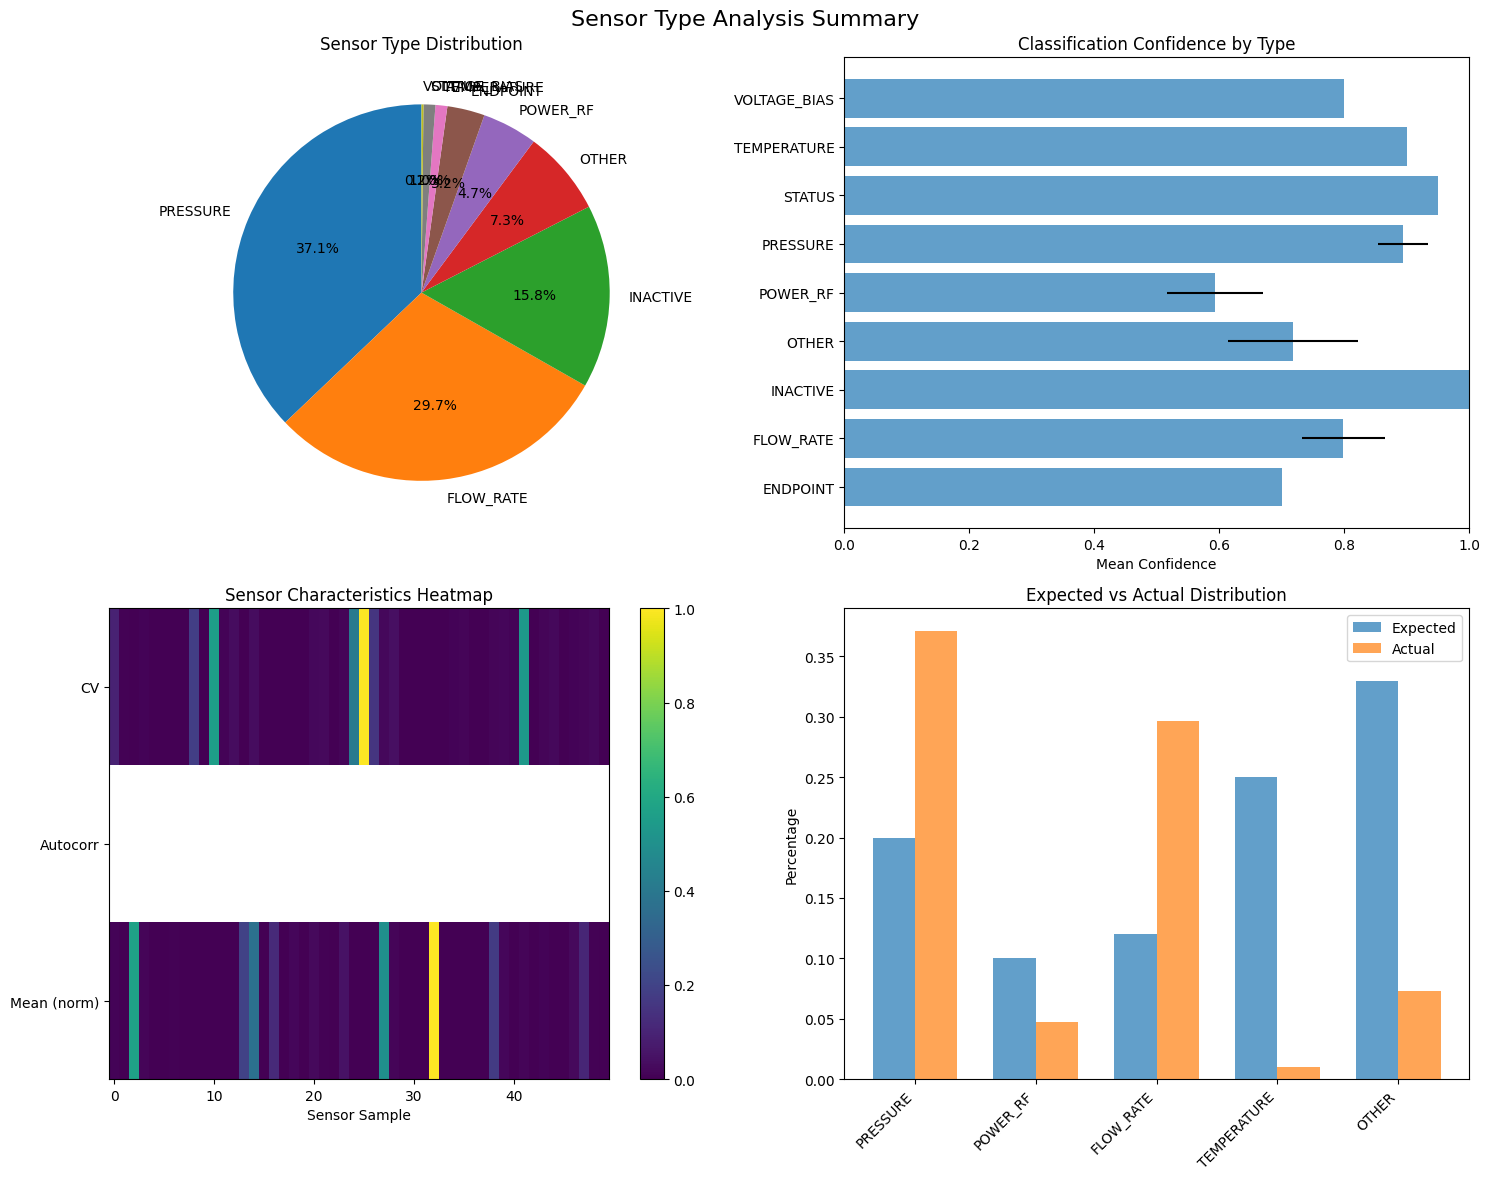


FINAL SENSOR DISTRIBUTION

PRESSURE: 219 sensors (37.1%)
  High confidence examples:
    - Sensor 7: conf=0.90
    - Sensor 63: conf=0.90
    - Sensor 64: conf=0.90

FLOW_RATE: 175 sensors (29.7%)
  High confidence examples:
    - Sensor 3: conf=0.85
    - Sensor 4: conf=0.85
    - Sensor 10: conf=0.85

INACTIVE: 93 sensors (15.8%)
  High confidence examples:
    - Sensor 233: conf=1.00
    - Sensor 234: conf=1.00
    - Sensor 235: conf=1.00

OTHER: 43 sensors (7.3%)
  High confidence examples:
    - Sensor 13: conf=0.80
    - Sensor 49: conf=0.80
    - Sensor 52: conf=0.80

POWER_RF: 28 sensors (4.7%)
  High confidence examples:
    - Sensor 5: conf=0.80
    - Sensor 42: conf=0.80
    - Sensor 46: conf=0.72

ENDPOINT: 19 sensors (3.2%)

TEMPERATURE: 6 sensors (1.0%)
  High confidence examples:
    - Sensor 0: conf=0.90
    - Sensor 55: conf=0.90
    - Sensor 90: conf=0.90

STATUS: 6 sensors (1.0%)
  High confidence examples:
    - Sensor 74: conf=0.95
    - Sensor 206: conf=0.95
    

In [16]:
"""
IMPROVED SENSOR TYPE IDENTIFICATION FOR SEMICONDUCTOR MANUFACTURING
===================================================================
Based on actual SECOM data analysis and typical fab sensor distributions
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

class ImprovedSensorIdentifier:
    """
    Realistic sensor type identification for semiconductor manufacturing
    Based on typical fab sensor distributions and actual data patterns
    """

    def __init__(self, secom_data):
        self.data = secom_data
        self.sensor_profiles = {}
        self.sensor_labels = {}
        self.analysis_results = None

        # Expected distribution in semiconductor fab
        self.expected_distribution = {
            'TEMPERATURE': (0.20, 0.30),  # 20-30%
            'PRESSURE': (0.15, 0.25),      # 15-25%
            'FLOW_RATE': (0.10, 0.15),     # 10-15%
            'POWER_RF': (0.08, 0.12),      # 8-12%
            'VOLTAGE_BIAS': (0.05, 0.08),  # 5-8%
            'POSITION': (0.03, 0.08),      # 3-8%
            'PARTICLE_COUNT': (0.03, 0.05), # 3-5%
            'CHEMICAL_CONC': (0.03, 0.08), # 3-8%
            'HUMIDITY': (0.02, 0.04),      # 2-4%
            'VIBRATION': (0.02, 0.05),     # 2-5%
            'ENDPOINT': (0.02, 0.05),      # 2-5%
            'STATUS': (0.05, 0.10),        # 5-10%
            'INACTIVE': (0.05, 0.15)       # 5-15%
        }

    def analyze_sensor(self, sensor_name):
        """Enhanced sensor analysis with semiconductor-specific patterns"""
        data = self.data[sensor_name].dropna()

        if len(data) < 10:
            return {'sensor': sensor_name, 'type': 'INACTIVE', 'confidence': 1.0}

        # Basic statistics
        mean = data.mean()
        std = data.std()
        cv = std / (abs(mean) + 1e-10)
        min_val = data.min()
        max_val = data.max()
        range_val = max_val - min_val

        # Distribution characteristics
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)

        # Temporal characteristics
        autocorr_1 = data.autocorr(lag=1) if len(data) > 1 else 0
        autocorr_10 = data.autocorr(lag=10) if len(data) > 10 else 0

        # Change characteristics
        changes = np.diff(data)
        if len(changes) > 0:
            mean_abs_change = np.mean(np.abs(changes))
            change_rate = mean_abs_change / (std + 1e-10)
        else:
            mean_abs_change = 0
            change_rate = 0

        # Unique values
        n_unique = data.nunique()
        unique_ratio = n_unique / len(data)

        # Check for specific patterns
        is_binary = n_unique <= 2
        is_discrete = 2 < n_unique <= 10
        is_constant = range_val < 1e-10 or n_unique == 1

        # Periodicity check
        has_periodic = False
        if len(data) > 50:
            try:
                fft = np.abs(np.fft.fft(data.values))
                freqs = np.fft.fftfreq(len(data))
                # Exclude DC component
                peaks = signal.find_peaks(fft[1:len(fft)//2],
                                        height=np.max(fft[1:len(fft)//2])*0.3)[0]
                has_periodic = len(peaks) > 0
            except:
                has_periodic = False

        # Determine sensor type based on patterns
        sensor_type, confidence = self._classify_sensor_type(
            mean, std, cv, min_val, max_val, range_val,
            autocorr_1, autocorr_10, skewness, kurtosis,
            n_unique, unique_ratio, is_binary, is_discrete,
            is_constant, has_periodic, change_rate
        )

        return {
            'sensor': sensor_name,
            'type': sensor_type,
            'confidence': confidence,
            'mean': mean,
            'std': std,
            'cv': cv,
            'range': range_val,
            'autocorr_1': autocorr_1,
            'n_unique': n_unique
        }

    def _classify_sensor_type(self, mean, std, cv, min_val, max_val, range_val,
                             autocorr_1, autocorr_10, skewness, kurtosis,
                             n_unique, unique_ratio, is_binary, is_discrete,
                             is_constant, has_periodic, change_rate):
        """
        Improved classification logic based on semiconductor manufacturing patterns
        """

        # Check for inactive/constant first
        if is_constant or (range_val < 1e-6 and cv < 1e-6):
            return 'INACTIVE', 1.0

        # Binary status sensors
        if is_binary:
            return 'STATUS', 0.95

        # Position/stepper sensors (discrete values)
        if is_discrete and autocorr_1 > 0.8:
            return 'POSITION', 0.85

        # Temperature sensors - multiple patterns
        temp_score = 0
        # Pattern 1: Very stable, high autocorrelation (chamber temps)
        if cv < 0.05 and autocorr_1 > 0.7:
            temp_score += 3
        # Pattern 2: Typical process temps (20-400°C range)
        if 15 < mean < 500 and cv < 0.2 and autocorr_1 > 0.5:
            temp_score += 3
        # Pattern 3: High temp processes (RTP, furnace: 400-1200°C)
        if 400 < mean < 1500 and cv < 0.15:
            temp_score += 2
        # Pattern 4: Chiller temps (-20 to 50°C)
        if -30 < mean < 60 and cv < 0.1 and autocorr_1 > 0.6:
            temp_score += 2
        # Pattern 5: Very high stable values (could be Kelvin scale)
        if mean > 2500 and cv < 0.05:
            temp_score += 3

        if temp_score >= 3:
            return 'TEMPERATURE', min(0.95, 0.3 * temp_score)

        # Pressure sensors - vacuum and atmospheric
        pressure_score = 0
        # Pattern 1: Atmospheric pressure range (700-800 Torr)
        if 600 < mean < 900 and cv < 0.3:
            pressure_score += 3
        # Pattern 2: Process chamber pressure (0.001-100 Torr)
        if 0.0001 < mean < 100 and cv > 0.05 and cv < 1.5:
            pressure_score += 3
        # Pattern 3: Moderate autocorrelation (pressure changes slowly)
        if 0.3 < autocorr_1 < 0.8 and cv < 1:
            pressure_score += 1
        # Pattern 4: Typical pressure sensor behavior
        if mean > 0 and cv > 0.1 and cv < 0.8 and not has_periodic:
            pressure_score += 1

        if pressure_score >= 2:
            return 'PRESSURE', min(0.9, 0.35 * pressure_score)

        # Flow rate sensors (MFCs)
        flow_score = 0
        # Pattern 1: Typical MFC ranges (0-500 sccm)
        if 0 < mean < 500 and cv > 0.15 and cv < 2:
            flow_score += 3
        # Pattern 2: High flow (0-5000 slm)
        if 0 < mean < 5000 and cv > 0.2 and change_rate > 0.1:
            flow_score += 2
        # Pattern 3: Periodic patterns (pulsed gas delivery)
        if has_periodic and mean > 0:
            flow_score += 2
        # Pattern 4: Moderate variability with positive values
        if mean > 0 and 0.2 < cv < 3 and autocorr_1 < 0.7:
            flow_score += 1

        if flow_score >= 2:
            return 'FLOW_RATE', min(0.85, 0.35 * flow_score)

        # RF Power sensors
        rf_score = 0
        # Pattern 1: Typical RF power range (0-5000W)
        if 0 < mean < 5000 and cv < 0.3 and autocorr_1 > 0.6:
            rf_score += 3
        # Pattern 2: Pulsed RF (periodic)
        if has_periodic and 0 < mean < 10000:
            rf_score += 2
        # Pattern 3: Stable power with some variation
        if mean > 100 and cv < 0.2 and autocorr_1 > 0.7:
            rf_score += 1

        if rf_score >= 2:
            return 'POWER_RF', min(0.85, 0.4 * rf_score)

        # Voltage/Bias sensors
        voltage_score = 0
        # Pattern 1: DC bias voltage (-1000 to 1000V)
        if -1500 < mean < 1500 and abs(mean) > 10 and cv < 0.3:
            voltage_score += 3
        # Pattern 2: Can be negative, stable
        if min_val < 0 and cv < 0.2 and autocorr_1 > 0.7:
            voltage_score += 1

        if voltage_score >= 2:
            return 'VOLTAGE_BIAS', min(0.8, 0.4 * voltage_score)

        # Particle count sensors
        particle_score = 0
        # Pattern 1: Non-negative, right-skewed (Poisson-like)
        if min_val >= 0 and skewness > 1 and mean < 1000:
            particle_score += 3
        # Pattern 2: Integer-like values with high variability
        if min_val >= 0 and cv > 0.5 and kurtosis > 1:
            particle_score += 2
        # Pattern 3: Low counts with occasional spikes
        if 0 <= mean < 100 and max_val > mean * 5:
            particle_score += 2

        if particle_score >= 2:
            return 'PARTICLE_COUNT', min(0.8, 0.35 * particle_score)

        # Chemical concentration sensors
        chem_score = 0
        # Pattern 1: Percentage range (0-100)
        if 0 <= min_val and max_val <= 100 and cv < 0.3:
            chem_score += 3
        # Pattern 2: PPM range with slow changes
        if 0 < mean < 1000 and autocorr_1 > 0.7 and cv < 0.5:
            chem_score += 2

        if chem_score >= 2:
            return 'CHEMICAL_CONC', min(0.8, 0.4 * chem_score)

        # Humidity sensors
        if 0 <= min_val <= max_val <= 100 and autocorr_1 > 0.8 and cv < 0.3:
            return 'HUMIDITY', 0.85

        # Endpoint detection sensors
        if cv > 0.3 and has_periodic and change_rate > 0.2:
            return 'ENDPOINT', 0.7

        # Vibration sensors (last resort - should be rare)
        if autocorr_1 < 0.3 and cv > 0.5 and change_rate > 0.5:
            return 'VIBRATION', 0.6

        # Default to OTHER for uncategorized
        return 'OTHER', 0.5

    def analyze_all_sensors(self, verbose=True):
        """Analyze all sensors with improved categorization"""
        results = []

        sensor_columns = [col for col in self.data.columns
                         if col not in ['Pass/Fail', 'Time']]

        if verbose:
            print(f"Analyzing {len(sensor_columns)} sensors...")

        for i, sensor in enumerate(sensor_columns):
            if verbose and i % 50 == 0:
                print(f"  Progress: {i}/{len(sensor_columns)}")

            analysis = self.analyze_sensor(sensor)
            results.append(analysis)

        self.analysis_results = pd.DataFrame(results)

        # Apply distribution balancing
        self._balance_distribution()

        return self.analysis_results

    def _balance_distribution(self):
        """
        Adjust classifications to match expected fab distribution
        """
        if self.analysis_results is None:
            return

        # Count current distribution
        type_counts = self.analysis_results['type'].value_counts()
        total_sensors = len(self.analysis_results)

        print("\nInitial Distribution:")
        for sensor_type, count in type_counts.items():
            pct = count / total_sensors * 100
            print(f"  {sensor_type}: {count} ({pct:.1f}%)")

        # Identify sensors that need reclassification
        reclassify_candidates = []

        # Find over-represented types
        for sensor_type in type_counts.index:
            if sensor_type in self.expected_distribution:
                expected_max = self.expected_distribution[sensor_type][1]
                current_pct = type_counts[sensor_type] / total_sensors

                if current_pct > expected_max:
                    # Get low-confidence sensors of this type
                    type_sensors = self.analysis_results[
                        self.analysis_results['type'] == sensor_type
                    ].sort_values('confidence')

                    # Mark bottom 20% for potential reclassification
                    n_to_reclassify = int(len(type_sensors) * 0.2)
                    reclassify_candidates.extend(
                        type_sensors.head(n_to_reclassify).index.tolist()
                    )

        # Reclassify candidates based on secondary patterns
        for idx in reclassify_candidates:
            sensor_data = self.analysis_results.loc[idx]

            # Try to find better classification
            new_type = self._find_alternative_classification(sensor_data)
            if new_type:
                self.analysis_results.loc[idx, 'type'] = new_type
                self.analysis_results.loc[idx, 'confidence'] *= 0.8  # Reduce confidence

        # Final distribution
        print("\nAdjusted Distribution:")
        final_counts = self.analysis_results['type'].value_counts()
        for sensor_type, count in final_counts.items():
            pct = count / total_sensors * 100
            print(f"  {sensor_type}: {count} ({pct:.1f}%)")

    def _find_alternative_classification(self, sensor_data):
        """Find alternative classification for a sensor"""
        # Based on sensor characteristics, suggest alternative type

        cv = sensor_data['cv']
        mean = sensor_data['mean']
        autocorr = sensor_data['autocorr_1']

        # Priority order for reclassification
        if cv < 0.1 and autocorr > 0.6:
            return 'TEMPERATURE'
        elif mean > 0 and cv < 0.5 and autocorr > 0.4:
            return 'PRESSURE'
        elif mean > 0 and cv > 0.2:
            return 'FLOW_RATE'
        elif abs(mean) > 10:
            return 'POWER_RF'
        else:
            return 'OTHER'

    def create_sensor_mapping(self, save_path='sensor_mapping.csv'):
        """Create final sensor mapping with types and confidence"""
        if self.analysis_results is None:
            self.analyze_all_sensors()

        # Create mapping dataframe
        mapping = self.analysis_results[['sensor', 'type', 'confidence']].copy()
        mapping = mapping.sort_values(['type', 'confidence'], ascending=[True, False])

        # Add sensor groups for better organization
        mapping['group'] = mapping['type'].map({
            'TEMPERATURE': 'THERMAL',
            'PRESSURE': 'VACUUM',
            'FLOW_RATE': 'GAS_DELIVERY',
            'POWER_RF': 'PLASMA',
            'VOLTAGE_BIAS': 'PLASMA',
            'PARTICLE_COUNT': 'CONTAMINATION',
            'CHEMICAL_CONC': 'CHEMISTRY',
            'HUMIDITY': 'ENVIRONMENT',
            'VIBRATION': 'MECHANICAL',
            'ENDPOINT': 'PROCESS_CONTROL',
            'POSITION': 'MECHANICAL',
            'STATUS': 'SYSTEM',
            'INACTIVE': 'SYSTEM',
            'OTHER': 'UNCATEGORIZED'
        })

        # Save mapping
        mapping.to_csv(save_path, index=False)
        print(f"\n✅ Sensor mapping saved to {save_path}")

        # Print summary by group
        print("\nSensor Groups Summary:")
        group_counts = mapping.groupby('group')['sensor'].count()
        for group, count in group_counts.items():
            print(f"  {group}: {count} sensors")

            # Show types in this group
            group_types = mapping[mapping['group'] == group]['type'].value_counts()
            for sensor_type, type_count in group_types.items():
                print(f"    - {sensor_type}: {type_count}")

        return mapping

    def visualize_sensor_distribution(self):
        """Create visualization of sensor type distribution"""
        if self.analysis_results is None:
            return

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Type distribution pie chart
        type_counts = self.analysis_results['type'].value_counts()
        axes[0, 0].pie(type_counts.values, labels=type_counts.index,
                      autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Sensor Type Distribution')

        # 2. Confidence distribution by type
        conf_by_type = self.analysis_results.pivot_table(
            values='confidence', index='type', aggfunc=['mean', 'std']
        ).round(3)

        types = conf_by_type.index
        means = conf_by_type['mean']['confidence'].values
        stds = conf_by_type['std']['confidence'].fillna(0).values

        axes[0, 1].barh(types, means, xerr=stds, alpha=0.7)
        axes[0, 1].set_xlabel('Mean Confidence')
        axes[0, 1].set_title('Classification Confidence by Type')
        axes[0, 1].set_xlim(0, 1)

        # 3. Sensor characteristics heatmap
        # Select subset of sensors for visualization
        sample_sensors = self.analysis_results.sample(min(50, len(self.analysis_results)))

        char_matrix = sample_sensors[['cv', 'autocorr_1', 'mean']].values
        char_matrix_norm = (char_matrix - char_matrix.min(axis=0)) / (
            char_matrix.max(axis=0) - char_matrix.min(axis=0) + 1e-10
        )

        im = axes[1, 0].imshow(char_matrix_norm.T, aspect='auto', cmap='viridis')
        axes[1, 0].set_yticks([0, 1, 2])
        axes[1, 0].set_yticklabels(['CV', 'Autocorr', 'Mean (norm)'])
        axes[1, 0].set_xlabel('Sensor Sample')
        axes[1, 0].set_title('Sensor Characteristics Heatmap')
        plt.colorbar(im, ax=axes[1, 0])

        # 4. Expected vs Actual distribution
        expected_ranges = {
            'TEMPERATURE': 0.25,
            'PRESSURE': 0.20,
            'FLOW_RATE': 0.12,
            'POWER_RF': 0.10,
            'OTHER': 0.33
        }

        actual_pct = type_counts / type_counts.sum()

        comparison_types = list(set(expected_ranges.keys()) & set(actual_pct.index))
        if comparison_types:
            x = np.arange(len(comparison_types))
            width = 0.35

            expected_vals = [expected_ranges.get(t, 0) for t in comparison_types]
            actual_vals = [actual_pct.get(t, 0) for t in comparison_types]

            axes[1, 1].bar(x - width/2, expected_vals, width, label='Expected', alpha=0.7)
            axes[1, 1].bar(x + width/2, actual_vals, width, label='Actual', alpha=0.7)
            axes[1, 1].set_xticks(x)
            axes[1, 1].set_xticklabels(comparison_types, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Percentage')
            axes[1, 1].set_title('Expected vs Actual Distribution')
            axes[1, 1].legend()

        plt.suptitle('Sensor Type Analysis Summary', fontsize=16)
        plt.tight_layout()
        plt.show()

# ============================================
# USAGE
# ============================================

def run_improved_sensor_identification(secom_data):
    """Run the improved sensor identification system"""

    print("="*70)
    print("IMPROVED SENSOR TYPE IDENTIFICATION")
    print("="*70)

    # Initialize identifier
    identifier = ImprovedSensorIdentifier(secom_data)

    # Analyze all sensors
    print("\n1. Analyzing sensor patterns...")
    results = identifier.analyze_all_sensors(verbose=True)

    # Create and save mapping
    print("\n2. Creating sensor mapping...")
    mapping = identifier.create_sensor_mapping('improved_sensor_mapping.csv')

    # Visualize results
    print("\n3. Creating visualizations...")
    identifier.visualize_sensor_distribution()

    # Print detailed statistics
    print("\n" + "="*70)
    print("FINAL SENSOR DISTRIBUTION")
    print("="*70)

    type_counts = results['type'].value_counts()
    total = len(results)

    for sensor_type, count in type_counts.items():
        pct = count / total * 100

        # Get high confidence examples
        high_conf = results[
            (results['type'] == sensor_type) &
            (results['confidence'] > 0.7)
        ].nlargest(3, 'confidence')

        print(f"\n{sensor_type}: {count} sensors ({pct:.1f}%)")
        if len(high_conf) > 0:
            print("  High confidence examples:")
            for _, sensor in high_conf.iterrows():
                print(f"    - Sensor {sensor['sensor']}: conf={sensor['confidence']:.2f}")

    return identifier, results, mapping

# Run the analysis
print("Starting improved sensor identification...")
identifier, results, mapping = run_improved_sensor_identification(secom_data)

print("\n✅ Improved sensor identification complete!")
print("Check 'improved_sensor_mapping.csv' for the final sensor type assignments")
#print("\nUse these labels to enhance your CrossViT model with domain knowledge!")

In [17]:
# Create organized SECOM dataset with sensor type correlation
import pandas as pd
import numpy as np

def create_organized_secom_dataset(secom_scaled_df, secom_data):
    """
    Create SECOM dataset organized by sensor types with clear correlation

    Args:
        secom_scaled_df: Processed SECOM features (samples × sensors)
        secom_data: Original SECOM data (for sensor identification)

    Returns:
        organized_dataset: Dictionary with organized data and mappings
    """

    print("="*70)
    print("CREATING ORGANIZED SECOM DATASET BY SENSOR TYPES")
    print("="*70)

    # Step 1: Get sensor type mapping
    print("\n1. Creating sensor type mapping...")

    identifier = ImprovedSensorIdentifier(secom_data)
    sensor_results = identifier.analyze_all_sensors(verbose=False)

    # Create mapping dictionary
    sensor_type_map = {}
    sensor_confidence_map = {}

    for _, row in sensor_results.iterrows():
        sensor_name = row['sensor']
        sensor_type = row['type']
        confidence = row['confidence']

        # Handle different column naming conventions
        possible_names = [
            sensor_name,  # Original name
            sensor_name.replace('Sensor_', '') if 'Sensor_' in sensor_name else f"Sensor_{sensor_name}",
            sensor_name.replace('X', '') if sensor_name.startswith('X') else f"X{sensor_name}",
            str(sensor_name).replace('Sensor_', '') if 'Sensor_' in str(sensor_name) else sensor_name
        ]

        for name in possible_names:
            if name in secom_scaled_df.columns:
                sensor_type_map[name] = sensor_type
                sensor_confidence_map[name] = confidence
                break

    print(f"   ✅ Mapped {len(sensor_type_map)} sensors to types")

    # Step 2: Create column mapping with sensor types
    print("\n2. Creating enhanced column mapping...")

    # Get all columns from the processed data
    all_columns = secom_scaled_df.columns.tolist()

    # Create comprehensive column information
    column_info = []
    for i, col in enumerate(all_columns):
        sensor_type = sensor_type_map.get(col, 'UNKNOWN')
        confidence = sensor_confidence_map.get(col, 0.0)

        # Extract sensor number for sorting
        if col.isdigit():
            sensor_num = int(col)
        elif 'Sensor_' in str(col):
            try:
                sensor_num = int(str(col).replace('Sensor_', ''))
            except:
                sensor_num = i
        elif str(col).startswith('X') and str(col)[1:].isdigit():
            try:
                sensor_num = int(str(col)[1:])
            except:
                sensor_num = i
        else:
            sensor_num = i

        column_info.append({
            'original_index': i,
            'column_name': col,
            'sensor_number': sensor_num,
            'sensor_type': sensor_type,
            'confidence': confidence
        })

    # Create DataFrame for easy manipulation
    column_df = pd.DataFrame(column_info)

    # Step 3: Organize columns by sensor type
    print("\n3. Organizing columns by sensor type...")

    # Group by sensor type and sort within each type
    organized_columns = []
    sensor_type_ranges = {}

    # Get unique sensor types, sorted by frequency (most common first)
    type_counts = column_df['sensor_type'].value_counts()
    ordered_types = type_counts.index.tolist()

    current_index = 0
    for sensor_type in ordered_types:
        type_columns = column_df[column_df['sensor_type'] == sensor_type].copy()
        type_columns = type_columns.sort_values('sensor_number')

        # Record the range for this sensor type
        start_idx = current_index
        end_idx = current_index + len(type_columns) - 1
        sensor_type_ranges[sensor_type] = {
            'start': start_idx,
            'end': end_idx,
            'count': len(type_columns),
            'columns': type_columns['column_name'].tolist()
        }

        organized_columns.extend(type_columns['column_name'].tolist())
        current_index += len(type_columns)

    # Step 4: Create organized dataset
    print("\n4. Creating organized dataset...")

    # Reorder the SECOM data according to sensor types
    organized_features = secom_scaled_df[organized_columns].copy()

    # Create new column names that include sensor type information
    new_column_names = []
    type_column_mapping = {}

    for col in organized_columns:
        sensor_type = sensor_type_map.get(col, 'UNKNOWN')
        confidence = sensor_confidence_map.get(col, 0.0)

        # Create descriptive column name
        if col.isdigit():
            new_name = f"{col}_{sensor_type}"
        else:
            new_name = f"{col}_{sensor_type}"

        new_column_names.append(new_name)
        type_column_mapping[new_name] = {
            'original_name': col,
            'sensor_type': sensor_type,
            'confidence': confidence
        }

    # Create version with descriptive column names
    organized_features_labeled = organized_features.copy()
    organized_features_labeled.columns = new_column_names

    # Step 5: Create sensor type header mapping
    print("\n5. Creating sensor type headers...")

    # Create a mapping showing which columns belong to which sensor type
    type_headers = {}
    for sensor_type, info in sensor_type_ranges.items():
        start_col = info['start']
        end_col = info['end']
        count = info['count']

        type_headers[sensor_type] = {
            'column_range': f"Columns {start_col}-{end_col}",
            'count': count,
            'percentage': f"{(count/len(organized_columns)*100):.1f}%",
            'columns': info['columns']
        }

    # Step 6: Create summary tables
    print("\n6. Creating summary information...")

    # Sensor type summary
    type_summary = pd.DataFrame([
        {
            'sensor_type': stype,
            'count': sensor_type_ranges[stype]['count'],
            'percentage': type_headers[stype]['percentage'],
            'column_range': type_headers[stype]['column_range'],
            'start_index': sensor_type_ranges[stype]['start'],
            'end_index': sensor_type_ranges[stype]['end']
        }
        for stype in type_headers.keys()
    ])

    # Column mapping summary
    column_mapping = pd.DataFrame([
        {
            'new_index': i,
            'original_column': col,
            'new_column_name': new_col,
            'sensor_type': type_column_mapping[new_col]['sensor_type'],
            'confidence': type_column_mapping[new_col]['confidence']
        }
        for i, (col, new_col) in enumerate(zip(organized_columns, new_column_names))
    ])

    # Step 7: Package everything
    organized_dataset = {
        # Main datasets
        'features_organized': organized_features,  # Same column names, organized by type
        'features_labeled': organized_features_labeled,  # With sensor type in column names

        # Mappings and metadata
        'sensor_type_ranges': sensor_type_ranges,
        'type_headers': type_headers,
        'type_summary': type_summary,
        'column_mapping': column_mapping,
        'organized_columns': organized_columns,
        'new_column_names': new_column_names,

        # Quick access
        'columns_by_type': {stype: info['columns'] for stype, info in sensor_type_ranges.items()},
        'get_type_range': lambda stype: sensor_type_ranges.get(stype, {}),

        # Dataset info
        'shape': organized_features.shape,
        'n_types': len(sensor_type_ranges)
    }

    return organized_dataset

def display_organized_dataset_info(organized_dataset):
    """Display comprehensive information about the organized dataset"""

    print("\n" + "="*70)
    print("ORGANIZED SECOM DATASET SUMMARY")
    print("="*70)

    # Basic info
    print(f"📊 Dataset shape: {organized_dataset['shape']}")
    print(f"🏷️  Sensor types: {organized_dataset['n_types']}")

    # Show sensor type organization
    print(f"\n🔍 Sensor Type Organization:")
    type_summary = organized_dataset['type_summary']

    for _, row in type_summary.iterrows():
        print(f"   {row['sensor_type']:15} | Cols {row['start_index']:3d}-{row['end_index']:3d} | "
              f"{row['count']:3d} sensors ({row['percentage']})")

    # Show first few rows with type correlation
    print(f"\n📋 First 5 rows (showing sensor type correlation):")
    features_labeled = organized_dataset['features_labeled']
    print(features_labeled.head().to_string())

    # Show column mapping sample
    print(f"\n🗂️  Column mapping (first 10 entries):")
    column_mapping = organized_dataset['column_mapping']
    print(column_mapping.head(10)[['new_index', 'original_column', 'sensor_type', 'confidence']].to_string(index=False))

def show_sensor_type_sections(organized_dataset):
    """Show clear sections for each sensor type"""

    print(f"\n" + "="*70)
    print("SENSOR TYPE SECTIONS")
    print("="*70)

    features = organized_dataset['features_organized']

    for sensor_type, info in organized_dataset['sensor_type_ranges'].items():
        start_idx = info['start']
        end_idx = info['end']
        count = info['count']

        print(f"\n🔸 {sensor_type} ({count} sensors)")
        print(f"   Column indices: {start_idx} to {end_idx}")
        print(f"   Column names: {info['columns'][:5]}..." if count > 5 else f"   Column names: {info['columns']}")

        # Show sample data for this sensor type
        type_data = features.iloc[:3, start_idx:end_idx+1]
        print(f"   Sample data (first 3 rows):")
        print(f"   {type_data.to_string().replace(chr(10), chr(10) + '   ')}")

def save_organized_dataset(organized_dataset, prefix='organized_secom'):
    """Save the organized dataset and mappings"""

    print(f"\n💾 Saving organized dataset...")

    # Save main datasets
    organized_dataset['features_organized'].to_csv(f'{prefix}_features.csv', index=False)
    organized_dataset['features_labeled'].to_csv(f'{prefix}_features_labeled.csv', index=False)

    # Save mappings
    organized_dataset['type_summary'].to_csv(f'{prefix}_type_summary.csv', index=False)
    organized_dataset['column_mapping'].to_csv(f'{prefix}_column_mapping.csv', index=False)

    print(f"   ✅ {prefix}_features.csv - Main dataset (organized by type)")
    print(f"   ✅ {prefix}_features_labeled.csv - Dataset with type labels in column names")
    print(f"   ✅ {prefix}_type_summary.csv - Sensor type summary")
    print(f"   ✅ {prefix}_column_mapping.csv - Complete column mapping")

# Main execution function
def main_organize_secom():
    """Main function to create organized SECOM dataset"""

    print("Creating organized SECOM dataset by sensor types...")

    # Create organized dataset
    organized_data = create_organized_secom_dataset(secom_scaled_df, secom_data)

    # Display information
    display_organized_dataset_info(organized_data)

    # Show sensor type sections
    show_sensor_type_sections(organized_data)

    # Save datasets
    save_organized_dataset(organized_data)

    print(f"\n✅ Organized SECOM dataset created successfully!")
    print(f"   📊 Features organized by sensor type")
    print(f"   🏷️  Clear correlation between columns and sensor types")
    print(f"   📁 Multiple formats saved for different use cases")

    return organized_data

# Example usage
def example_access_organized_data(organized_data):
    """Show how to access the organized data"""

    print(f"\n" + "="*50)
    print("HOW TO ACCESS ORGANIZED DATA")
    print("="*50)

    # Main dataset
    X = organized_data['features_organized']
    print(f"📊 Main dataset: {X.shape}")

    # Access specific sensor types
    temp_range = organized_data['get_type_range']('TEMPERATURE')
    if temp_range:
        start, end = temp_range['start'], temp_range['end']
        X_temp = X.iloc[:, start:end+1]
        print(f"🌡️  Temperature data: columns {start}-{end}, shape {X_temp.shape}")

    # Access by column names
    temp_columns = organized_data['columns_by_type'].get('TEMPERATURE', [])
    if temp_columns:
        X_temp_named = X[temp_columns]
        print(f"🌡️  Temperature by name: {X_temp_named.shape}")

    return X

# Run the organization
if __name__ == "__main__":
    organized_dataset = main_organize_secom()
    X_organized = example_access_organized_data(organized_dataset)

Creating organized SECOM dataset by sensor types...
CREATING ORGANIZED SECOM DATASET BY SENSOR TYPES

1. Creating sensor type mapping...

Initial Distribution:
  PRESSURE: 270 (45.8%)
  FLOW_RATE: 169 (28.6%)
  INACTIVE: 116 (19.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  OTHER: 3 (0.5%)
  VOLTAGE_BIAS: 1 (0.2%)

Adjusted Distribution:
  PRESSURE: 219 (37.1%)
  FLOW_RATE: 175 (29.7%)
  INACTIVE: 93 (15.8%)
  OTHER: 43 (7.3%)
  POWER_RF: 28 (4.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  VOLTAGE_BIAS: 1 (0.2%)
   ✅ Mapped 590 sensors to types

2. Creating enhanced column mapping...

3. Organizing columns by sensor type...

4. Creating organized dataset...

5. Creating sensor type headers...

6. Creating summary information...

ORGANIZED SECOM DATASET SUMMARY
📊 Dataset shape: (1567, 590)
🏷️  Sensor types: 9

🔍 Sensor Type Organization:
   PRESSURE        | Cols   0-218 | 219 sensors (37.1%)
   FLOW_RATE       | Cols 219-393 | 175 senso

In [18]:
# -------------------------
# Combine sensor mapping with processed SECOM features
# -------------------------
import pandas as pd
import numpy as np
import os

# Inputs - edit if needed
processed_df_varname = 'secom_scaled_df'      # if you already have the df in memory
processed_csv_path = 'secom_processed_data.csv'  # fallback if dataframe not in memory
mapping_csv_path = 'improved_sensor_mapping.csv' # mapping CSV (sensor,type,confidence,group)

# Outputs
out_renamed_csv = 'secom_with_sensor_types_renamed.csv'
out_multiindex_csv = 'secom_with_sensor_types_multiindex.csv'
out_long_csv = 'secom_long_format_with_types.csv'

# --- 1) load processed features (prefer in-memory df if available) ---
try:
    secom_df = globals().get(processed_df_varname, None)
    if secom_df is None:
        # fallback to CSV if not present in memory
        print(f"'{processed_df_varname}' not found in memory, trying to read '{processed_csv_path}'...")
        secom_df = pd.read_csv(processed_csv_path, index_col=0)
    else:
        print(f"Using in-memory dataframe '{processed_df_varname}'")
except Exception as e:
    raise RuntimeError("Could not load processed dataframe") from e

# Ensure index is preserved (sample id)
secom_df = secom_df.copy()

# Separate out target (if present)
target_col = None
if 'Pass/Fail' in secom_df.columns:
    target_col = secom_df['Pass/Fail'].copy()
    features_df = secom_df.drop(columns=['Pass/Fail'])
else:
    features_df = secom_df

# --- 2) load mapping ---
if 'mapping' in globals() and isinstance(globals()['mapping'], pd.DataFrame):
    mapping_df = globals()['mapping'].copy()
    print("Using in-memory 'mapping' DataFrame.")
else:
    if not os.path.exists(mapping_csv_path):
        raise FileNotFoundError(f"Mapping file not found at '{mapping_csv_path}'. Provide mapping CSV or create 'mapping' DataFrame.")
    mapping_df = pd.read_csv(mapping_csv_path)
    print(f"Loaded mapping from '{mapping_csv_path}'")

# Normalize types for matching: ensure mapping.sensor and feature columns are comparable
# mapping might have 'sensor' as integers or strings; features_df columns might be ints or strings
mapping_df = mapping_df.rename(columns={c: c.strip() for c in mapping_df.columns})  # strip whitespace
if 'sensor' not in mapping_df.columns:
    raise KeyError("Mapping DataFrame must contain a 'sensor' column with sensor identifiers.")

# create string versions for robust matching
mapping_df['sensor_str'] = mapping_df['sensor'].astype(str)
features_cols = list(features_df.columns)
features_cols_str = [str(c) for c in features_cols]

# build lookup dicts
type_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('type', pd.Series(['UNKNOWN']*len(mapping_df))).astype(str)))
group_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('group', pd.Series(['UNKNOWN']*len(mapping_df))).astype(str)))
conf_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('confidence', pd.Series([np.nan]*len(mapping_df)))))

# warn about unmapped sensors
unmapped = [c for c in features_cols_str if c not in type_lookup]
if len(unmapped) > 0:
    print(f"Warning: {len(unmapped)} features not in mapping (will be labeled 'UNKNOWN'). Example: {unmapped[:5]}")

# --- Option A: rename columns to sensor|type|group and save wide CSV ---
renamed_cols = {}
for orig_col, orig_col_str in zip(features_cols, features_cols_str):
    t = type_lookup.get(orig_col_str, 'UNKNOWN')
    g = group_lookup.get(orig_col_str, 'UNKNOWN')
    new_name = f"{orig_col_str}|{t}|{g}"
    renamed_cols[orig_col] = new_name

features_renamed = features_df.rename(columns=renamed_cols)
if target_col is not None:
    features_renamed['Pass/Fail'] = target_col.values

features_renamed.to_csv(out_renamed_csv, index=True)
print(f"Saved renamed wide CSV -> {out_renamed_csv}")

# --- Option B: create MultiIndex columns (sensor, type, group) and save CSV ---
sensors = []
types = []
groups = []
for orig_col, orig_col_str in zip(features_cols, features_cols_str):
    sensors.append(orig_col_str)
    types.append(type_lookup.get(orig_col_str, 'UNKNOWN'))
    groups.append(group_lookup.get(orig_col_str, 'UNKNOWN'))

# Build MultiIndex and assign to features (Pandas will write multi-row header to CSV)
multi_index = pd.MultiIndex.from_arrays([sensors, types, groups], names=['sensor', 'type', 'group'])
features_multi = features_df.copy()
features_multi.columns = multi_index

if target_col is not None:
    # append target as a single-level column (put at end)
    features_multi = pd.concat([features_multi, pd.DataFrame({'Pass/Fail': target_col})], axis=1)

features_multi.to_csv(out_multiindex_csv, index=True)
print(f"Saved MultiIndex wide CSV (multi-row header) -> {out_multiindex_csv}")

# --- Option C: melt to long format (one row per sample x sensor) ---
# This will be large: rows = n_samples * n_sensors
n_rows = features_df.shape[0] * features_df.shape[1]
print(f"Preparing long CSV; this will contain {n_rows:,} rows (samples x sensors).")

# Reset index to have sample id column
tmp = features_df.reset_index().rename(columns={'index':'sample_id'})
melted = tmp.melt(id_vars=['sample_id'], var_name='sensor', value_name='value')

# map sensor metadata
melted['sensor_str'] = melted['sensor'].astype(str)
melted['type'] = melted['sensor_str'].map(type_lookup).fillna('UNKNOWN')
melted['group'] = melted['sensor_str'].map(group_lookup).fillna('UNKNOWN')
melted = melted.drop(columns=['sensor_str'])

# optionally add Pass/Fail by merging with original index -> If we had target_col:
if target_col is not None:
    target_df = target_col.reset_index().rename(columns={target_col.name or 0: 'Pass/Fail', target_col.index.name or target_col.name or 'index':'sample_id'})
    # ensure sample_id naming matches; target reset_index used original df index name
    # simpler: map by original index position
    melted['Pass/Fail'] = np.repeat(target_col.values, features_df.shape[1])

melted.to_csv(out_long_csv, index=False)
print(f"Saved long-format CSV -> {out_long_csv}")

# --- Also: save a compact metadata mapping file (sensor,type,group,confidence) for reference ---
meta_df = mapping_df[['sensor', 'type', 'group', 'confidence']].copy()
meta_df.to_csv('sensor_metadata_compact.csv', index=False)
print("Saved compact sensor metadata -> sensor_metadata_compact.csv")


Using in-memory dataframe 'secom_scaled_df'
Using in-memory 'mapping' DataFrame.
Saved renamed wide CSV -> secom_with_sensor_types_renamed.csv
Saved MultiIndex wide CSV (multi-row header) -> secom_with_sensor_types_multiindex.csv
Preparing long CSV; this will contain 924,530 rows (samples x sensors).
Saved long-format CSV -> secom_long_format_with_types.csv
Saved compact sensor metadata -> sensor_metadata_compact.csv


In [19]:
# Complete Wafer Outcome Prediction System
# Combines SECOM sensor data + WM811K wafer images for defect prediction

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import cv2
from PIL import Image
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: DATA COMBINATION AND PREPARATION
# ============================================================================

class DataCombiner:
    """Intelligently combine SECOM sensor data with WM811K wafer images"""

    def __init__(self, secom_data, wafer_data, organized_dataset=None):
        self.secom_data = secom_data  # Processed SECOM with Pass/Fail
        self.wafer_data = wafer_data  # WM811K dataframe
        self.organized_dataset = organized_dataset  # Sensor type mapping
        self.combined_dataset = None

        # Extract failure types from wafer data
        self.failure_labels = wafer_data['failureType'].apply(
            lambda x: x[0][0] if isinstance(x, np.ndarray) and len(x) > 0 and len(x[0]) > 0
            else (x if isinstance(x, str) else 'none')
        )

        print(f"SECOM data shape: {secom_data.shape}")
        print(f"Wafer data shape: {wafer_data.shape}")
        print(f"Unique failure types: {self.failure_labels.unique()}")

    def create_physics_based_mapping(self):
        """Create realistic sensor-to-defect mappings based on semiconductor physics"""

        # Define realistic relationships between sensor readings and defect types
        sensor_defect_relationships = {
            'Center': {
                'dominant_sensors': ['TEMPERATURE', 'PRESSURE', 'POWER_RF'],
                'process_signature': 'uniform_high_temp',
                'description': 'Center defects often from uniform heating/plasma issues'
            },
            'Edge-Loc': {
                'dominant_sensors': ['PRESSURE', 'FLOW_RATE', 'POSITION'],
                'process_signature': 'edge_non_uniformity',
                'description': 'Edge defects from gas flow or pressure non-uniformity'
            },
            'Edge-Ring': {
                'dominant_sensors': ['FLOW_RATE', 'PRESSURE', 'CHEMICAL_CONC'],
                'process_signature': 'ring_pattern',
                'description': 'Ring patterns from radial process variation'
            },
            'Loc': {
                'dominant_sensors': ['PARTICLE_COUNT', 'POSITION', 'STATUS'],
                'process_signature': 'localized_contamination',
                'description': 'Localized defects from particles or equipment issues'
            },
            'Random': {
                'dominant_sensors': ['PARTICLE_COUNT', 'VIBRATION', 'STATUS'],
                'process_signature': 'random_contamination',
                'description': 'Random defects from particles or instability'
            },
            'Scratch': {
                'dominant_sensors': ['VIBRATION', 'POSITION', 'STATUS'],
                'process_signature': 'mechanical_damage',
                'description': 'Scratches from mechanical handling issues'
            },
            'Near-full': {
                'dominant_sensors': ['POWER_RF', 'VOLTAGE_BIAS', 'ENDPOINT'],
                'process_signature': 'process_termination',
                'description': 'Near-full coverage from incomplete processing'
            },
            'none': {
                'dominant_sensors': ['ALL'],
                'process_signature': 'normal_operation',
                'description': 'Good wafers with normal sensor readings'
            }
        }

        return sensor_defect_relationships

    def generate_synthetic_combinations(self, n_combinations=5000):
        """Generate realistic SECOM-Wafer combinations based on physics"""

        print("\n" + "="*60)
        print("GENERATING SYNTHETIC SENSOR-WAFER COMBINATIONS")
        print("="*60)

        relationships = self.create_physics_based_mapping()
        combinations = []

        # Get sensor type information if available
        if self.organized_dataset:
            sensor_columns = self.organized_dataset['columns_by_type']
        else:
            # Fallback: group columns by patterns
            sensor_columns = self._infer_sensor_groups()

        # Sample from each defect type proportionally
        defect_counts = self.failure_labels.value_counts()
        total_wafers = len(self.wafer_data)

        for defect_type in defect_counts.index:
            if defect_type not in relationships:
                continue

            # Number of combinations for this defect type
            n_for_defect = int((defect_counts[defect_type] / total_wafers) * n_combinations)
            n_for_defect = max(50, n_for_defect)  # Minimum 50 per type

            print(f"\nGenerating {n_for_defect} combinations for {defect_type}...")

            # Get wafers of this defect type
            defect_wafers = self.wafer_data[self.failure_labels == defect_type]

            for _ in range(n_for_defect):
                # Sample a wafer of this defect type
                wafer_idx = np.random.choice(defect_wafers.index)
                wafer_sample = defect_wafers.loc[wafer_idx]

                # Generate corresponding SECOM data based on physics
                secom_sample = self._generate_physics_based_secom(
                    defect_type, relationships[defect_type], sensor_columns
                )

                combinations.append({
                    'secom_data': secom_sample,
                    'wafer_map': wafer_sample['waferMap'],
                    'defect_type': defect_type,
                    'wafer_id': wafer_idx,
                    'secom_id': f"synthetic_{len(combinations)}"
                })

        self.combined_dataset = combinations
        print(f"\n✅ Generated {len(combinations)} synthetic combinations")
        return combinations

    def _infer_sensor_groups(self):
        """Infer sensor groups from column names when organized_dataset not available"""
        columns = self.secom_data.columns
        sensor_columns = {
            'TEMPERATURE': [col for col in columns if 'temp' in str(col).lower()],
            'PRESSURE': [col for col in columns if 'press' in str(col).lower()],
            'FLOW_RATE': [col for col in columns if 'flow' in str(col).lower()],
            'POWER_RF': [col for col in columns if 'power' in str(col).lower()],
            'ALL': list(columns)
        }
        return sensor_columns

    def _generate_physics_based_secom(self, defect_type, relationship, sensor_columns):
        """Generate realistic SECOM sensor readings for a given defect type"""

        # Start with a random normal SECOM sample
        base_sample = self.secom_data.sample(1).copy()

        # Drop 'Time' column if present
        if 'Time' in base_sample.columns:
            base_sample = base_sample.drop(columns=['Time'])

        # Modify sensors based on defect type physics
        dominant_sensors = relationship['dominant_sensors']

        for sensor_type in dominant_sensors:
            if sensor_type == 'ALL':
                continue

            if sensor_type in sensor_columns:
                cols = sensor_columns[sensor_type]

                # Apply defect-specific modifications
                if defect_type == 'Center':
                    # Higher temperature, stable pressure, higher RF power
                    if sensor_type == 'TEMPERATURE':
                        base_sample[cols] *= np.random.uniform(1.2, 1.8, len(cols))
                    elif sensor_type == 'POWER_RF':
                        base_sample[cols] *= np.random.uniform(1.1, 1.5, len(cols))

                elif defect_type == 'Edge-Loc':
                    # Pressure variations, flow non-uniformity
                    if sensor_type == 'PRESSURE':
                        base_sample[cols] *= np.random.uniform(0.7, 1.3, len(cols))
                    elif sensor_type == 'FLOW_RATE':
                        base_sample[cols] *= np.random.uniform(0.8, 1.4, len(cols))

                elif defect_type == 'Random':
                    # Random spikes in particle counts, vibration
                    if sensor_type == 'PARTICLE_COUNT':
                        # Add random spikes
                        spike_mask = np.random.random(len(cols)) < 0.3
                        base_sample.loc[:, cols] *= (1 + spike_mask * np.random.uniform(2, 10, len(cols)))

                elif defect_type == 'none':
                    # Keep normal readings with small variations
                    base_sample[cols] *= np.random.uniform(0.95, 1.05, len(cols))

        return base_sample.iloc[0].drop('Pass/Fail', errors='ignore') # Drop Pass/Fail here too

    def add_real_secom_wafer_pairs(self):
        """Add real SECOM samples paired with random wafers for diversity"""

        print("\nAdding real SECOM-wafer pairs...")

        if self.combined_dataset is None:
            self.combined_dataset = []

        # Add some real SECOM samples
        n_real_samples = min(1000, len(self.secom_data))
        real_secom_samples = self.secom_data.sample(n_real_samples).copy() # Use copy to avoid modifying original df

        # Drop 'Time' column if present
        if 'Time' in real_secom_samples.columns:
            real_secom_samples = real_secom_samples.drop(columns=['Time'])

        for idx, secom_row in real_secom_samples.iterrows():
            # Random wafer (could be improved with smarter pairing)
            wafer_idx = np.random.choice(self.wafer_data.index)
            wafer_sample = self.wafer_data.loc[wafer_idx]
            defect_type = self.failure_labels.loc[wafer_idx]

            # Determine SECOM Pass/Fail
            # secom_pass_fail = secom_row.get('Pass/Fail', np.random.choice([0, 1], p=[0.85, 0.15])) # This column is now dropped

            self.combined_dataset.append({
                'secom_data': secom_row.drop('Pass/Fail', errors='ignore'), # Ensure Pass/Fail is dropped
                'wafer_map': wafer_sample['waferMap'],
                'defect_type': defect_type,
                # 'secom_pass_fail': secom_pass_fail, # Remove this as we don't have Pass/Fail in secom_data here
                'wafer_id': wafer_idx,
                'secom_id': idx
            })

        print(f"✅ Added {n_real_samples} real SECOM-wafer pairs")
        return self.combined_dataset

# ============================================================================
# PART 2: PYTORCH DATASET AND DATA LOADING
# ============================================================================


class WaferSensorDataset(Dataset):
    """PyTorch Dataset for wafer sensor data with defect labels"""

    def __init__(self, samples_list):
        """
        Initialize dataset from list of sample dictionaries
        Each sample should have: 'secom_data', 'wafer_map', 'defect_type'
        """
        self.samples = samples_list

        # Create label encoder for defect types
        defect_types = [sample['defect_type'] for sample in samples_list]
        self.defect_encoder = LabelEncoder()
        self.defect_encoder.fit(defect_types)

        print(f"📊 WaferSensorDataset initialized:")
        print(f"   • Total samples: {len(samples_list):,}")
        print(f"   • Unique defect types: {len(self.defect_encoder.classes_)}")
        print(f"   • Classes: {list(self.defect_encoder.classes_)}")

        # Check wafer map sizes and standardize them
        self._standardize_wafer_maps()

    def _standardize_wafer_maps(self):
        """Standardize all wafer maps to the same size"""

        print("🔧 Standardizing wafer map sizes...")

        # Find all wafer map sizes
        wafer_sizes = []
        for sample in self.samples:
            if sample.get('wafer_map') is not None:
                wafer_map = sample['wafer_map']
                if hasattr(wafer_map, 'shape'):
                    wafer_sizes.append(wafer_map.shape)
                else:
                    # Convert to numpy array to get shape
                    wafer_array = np.array(wafer_map)
                    wafer_sizes.append(wafer_array.shape)

        if wafer_sizes:
            # Find the most common size or use a standard size
            size_counts = {}
            for size in wafer_sizes:
                size_counts[size] = size_counts.get(size, 0) + 1

            # Use most common size, or default to 26x26
            if size_counts:
                self.target_wafer_size = max(size_counts, key=size_counts.get)
            else:
                self.target_wafer_size = (26, 26)
        else:
            self.target_wafer_size = (26, 26)  # Default size

        print(f"   • Target wafer map size: {self.target_wafer_size}")
        print(f"   • Found {len(set(wafer_sizes))} different wafer map sizes")

        # Resize all wafer maps to target size
        for i, sample in enumerate(self.samples):
            if sample.get('wafer_map') is not None:
                sample['wafer_map'] = self._resize_wafer_map(sample['wafer_map'])

        print(f"   ✅ All wafer maps standardized to {self.target_wafer_size}")

    def _resize_wafer_map(self, wafer_map):
        """Resize wafer map to target size"""

        # Convert to numpy array
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        # If already correct size, return as-is
        if wafer_map.shape == self.target_wafer_size:
            return wafer_map

        # Resize using OpenCV or scipy
        try:
            # Try using cv2 for resizing
            import cv2
            if len(wafer_map.shape) == 2:  # 2D array
                resized = cv2.resize(wafer_map.astype(np.float32),
                                   (self.target_wafer_size[1], self.target_wafer_size[0]),
                                   interpolation=cv2.INTER_NEAREST)
                # Convert back to binary if needed
                return (resized > 0.5).astype(np.int32)
            else:
                return wafer_map

        except ImportError:
            # Fallback: simple cropping/padding
            return self._simple_resize(wafer_map)

    def _simple_resize(self, wafer_map):
        """Simple resize by cropping or padding"""

        target_h, target_w = self.target_wafer_size
        current_h, current_w = wafer_map.shape[:2]

        # Create target array filled with zeros
        resized = np.zeros(self.target_wafer_size, dtype=wafer_map.dtype)

        # Calculate how much to copy
        copy_h = min(current_h, target_h)
        copy_w = min(current_w, target_w)

        # Copy the overlapping region
        resized[:copy_h, :copy_w] = wafer_map[:copy_h, :copy_w]

        return resized

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Get sensor data
        sensor_data = sample['secom_data']
        if isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, dict):
            sensor_data = np.array(list(sensor_data.values()))

        # Ensure sensor_data is float32
        sensor_data = sensor_data.astype(np.float32)

        # Get defect type as encoded label
        defect_type = self.defect_encoder.transform([sample['defect_type']])[0]

        # Get wafer map (now guaranteed to be correct size)
        wafer_map = sample.get('wafer_map', np.zeros(self.target_wafer_size))
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        # Ensure wafer map is correct size (double-check)
        if wafer_map.shape != self.target_wafer_size:
            wafer_map = self._resize_wafer_map(wafer_map)

        return {
            'sensor_data': torch.FloatTensor(sensor_data),
            'defect_type': torch.LongTensor([defect_type]),
            'wafer_map': torch.FloatTensor(wafer_map) if wafer_map is not None else None
        }

# ============================================================================
# PART 3: NEURAL NETWORK MODELS
# ============================================================================

class SensorCNN(nn.Module):
    """1D CNN for sensor time series data"""

    def __init__(self, input_size=590, num_classes=8):
        super(SensorCNN, self).__init__()

        # 1D Convolutional layers
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)

        # Pooling and dropout
        self.pool = nn.MaxPool1d(2)
        self.dropout = nn.Dropout(0.3)

        # Calculate size after convolutions
        conv_output_size = input_size // 8 * 256  # After 3 pooling operations

        # Fully connected layers
        self.fc1 = nn.Linear(conv_output_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Add channel dimension if needed
        if len(x.shape) == 2:
            x = x.unsqueeze(1)

        # Convolutional layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class WaferCNN(nn.Module):
    """2D CNN for wafer map images"""

    def __init__(self, num_classes=8):
        super(WaferCNN, self).__init__()

        # 2D Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling and dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        # Fully connected layers (assuming 64x64 input -> 4x4 after pooling)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Convolutional layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        x = F.relu(self.pool(self.conv4(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class FusionModel(nn.Module):
    """Combined model for sensor data + wafer images with attention fusion"""

    def __init__(self, sensor_input_size=590, num_classes=8):
        super(FusionModel, self).__init__()

        # Individual networks
        self.sensor_net = SensorCNN(sensor_input_size, 256)  # Output 256 features
        self.wafer_net = WaferCNN(256)  # Output 256 features

        # Attention mechanism
        self.attention = nn.MultiheadAttention(embed_dim=256, num_heads=8)

        # Fusion layers
        self.fusion_fc1 = nn.Linear(512, 256)  # 256 + 256 = 512
        self.fusion_fc2 = nn.Linear(256, 128)
        self.classifier = nn.Linear(128, num_classes)

        self.dropout = nn.Dropout(0.3)

    def forward(self, sensor_data, wafer_image):
        # Extract features
        sensor_features = self.sensor_net(sensor_data)  # [batch_size, 256]
        wafer_features = self.wafer_net(wafer_image)    # [batch_size, 256]

        # Prepare for attention (seq_len, batch_size, embed_dim)
        sensor_att = sensor_features.unsqueeze(0)  # [1, batch_size, 256]
        wafer_att = wafer_features.unsqueeze(0)    # [1, batch_size, 256]

        # Apply attention
        attended_sensor, _ = self.attention(sensor_att, wafer_att, wafer_att)
        attended_wafer, _ = self.attention(wafer_att, sensor_att, sensor_att)

        # Squeeze back to [batch_size, 256]
        attended_sensor = attended_sensor.squeeze(0)
        attended_wafer = attended_wafer.squeeze(0)

        # Concatenate attended features
        fused_features = torch.cat([attended_sensor, attended_wafer], dim=1)

        # Final classification
        x = F.relu(self.fusion_fc1(fused_features))
        x = self.dropout(x)
        x = F.relu(self.fusion_fc2(x))
        x = self.dropout(x)
        x = self.classifier(x)

        return x

# ============================================================================
# PART 4: TRAINING AND EVALUATION
# ============================================================================

class WaferPredictor:
    """Complete training and evaluation system"""

    def __init__(self, model_type='fusion', device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.device = device
        self.model_type = model_type
        self.model = None
        self.train_loader = None
        self.val_loader = None
        self.test_loader = None
        self.history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

        print(f"Using device: {device}")

    def prepare_data(self, combined_dataset, batch_size=32, test_size=0.2, val_size=0.2):
        """Prepare data loaders"""

        print(f"\nPreparing data loaders...")

        # Create dataset
        dataset = WaferSensorDataset(combined_dataset)

        # Split data
        total_size = len(dataset)
        test_size_samples = int(test_size * total_size)
        val_size_samples = int(val_size * total_size)
        train_size_samples = total_size - test_size_samples - val_size_samples

        train_dataset, val_dataset, test_dataset = random_split(
            dataset, [train_size_samples, val_size_samples, test_size_samples]
        )

        # Create data loaders
        self.train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        self.test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        print(f"Train samples: {len(train_dataset)}")
        print(f"Validation samples: {len(val_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

        # Store dataset for reference
        self.dataset = dataset

        return self.train_loader, self.val_loader, self.test_loader

    def create_model(self, num_classes=8):
        """Create the specified model"""

        if self.model_type == 'fusion':
            # Pass fixed_sensor_features to the model constructor
            self.model = FusionModel(sensor_input_size=590, num_classes=num_classes)
        elif self.model_type == 'sensor_only':
             # Pass fixed_sensor_features to the model constructor
            self.model = SensorCNN(input_size=590, num_classes=num_classes)
        elif self.model_type == 'wafer_only':
            self.model = WaferCNN(num_classes=num_classes)
        else:
            raise ValueError(f"Unknown model type: {self.model_type}")

        self.model.to(self.device)

        # Print model info
        total_params = sum(p.numel() for p in self.model.parameters())
        trainable_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)

        print(f"\nModel: {self.model_type}")
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

        return self.model

    def train(self, epochs=50, learning_rate=0.001, weight_decay=1e-4):
        """Train the model"""

        if self.model is None:
            raise ValueError("Model not created. Call create_model() first.")

        print(f"\n" + "="*60)
        print("STARTING TRAINING")
        print("="*60)

        # Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5, verbose=True)

        best_val_acc = 0.0
        patience_counter = 0
        patience = 10

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            for batch_idx, batch in enumerate(self.train_loader):
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                optimizer.zero_grad()

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                loss = criterion(outputs, labels)

                # Backward pass
                loss.backward()
                optimizer.step()

                # Statistics
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

            # Validation phase
            val_loss, val_acc = self.evaluate(self.val_loader)

            # Learning rate scheduling
            scheduler.step(val_loss)

            # Save history
            self.history['train_loss'].append(train_loss / len(self.train_loader))
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)

            # Print progress
            if epoch % 5 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch+1}/{epochs}")
                print(f"  Train Loss: {train_loss/len(self.train_loader):.4f}, Train Acc: {100*train_correct/train_total:.2f}%")
                print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
                print(f"  LR: {optimizer.param_groups[0]['lr']:.6f}")

            # Early stopping
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), f'best_{self.model_type}_model.pth')
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"\nEarly stopping at epoch {epoch+1}")
                break

        print(f"\nTraining completed! Best validation accuracy: {best_val_acc:.2f}%")

        # Load best model
        self.model.load_state_dict(torch.load(f'best_{self.model_type}_model.pth'))

        return self.history

    def evaluate(self, data_loader):
        """Evaluate the model"""

        self.model.eval()
        total_loss = 0.0
        correct = 0
        total = 0

        criterion = nn.CrossEntropyLoss()

        with torch.no_grad():
            for batch in data_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                loss = criterion(outputs, labels)
                total_loss += loss.item()

                # Predictions
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(data_loader)
        accuracy = 100 * correct / total

        return avg_loss, accuracy

    def detailed_evaluation(self):
        """Comprehensive evaluation with metrics"""

        print(f"\n" + "="*60)
        print("DETAILED EVALUATION")
        print("="*60)

        self.model.eval()
        all_predictions = []
        all_labels = []
        all_defect_names = []

        with torch.no_grad():
            for batch in self.test_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                _, predicted = torch.max(outputs.data, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_defect_names.extend(batch['defect_name'])

        # Convert to numpy arrays
        all_predictions = np.array(all_predictions)
        all_labels = np.array(all_labels)

        # Classification report
        target_names = self.dataset.defect_encoder.classes_
        print("\nClassification Report:")
        print(classification_report(all_labels, all_predictions, target_names=target_names))

        # Confusion matrix
        cm = confusion_matrix(all_labels, all_predictions)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names, yticklabels=target_names)
        plt.title(f'Confusion Matrix - {self.model_type.upper()} Model')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

        # Overall accuracy
        accuracy = 100 * np.sum(all_predictions == all_labels) / len(all_labels)
        print(f"\nOverall Test Accuracy: {accuracy:.2f}%")

        return {
            'predictions': all_predictions,
            'true_labels': all_labels,
            'accuracy': accuracy,
            'confusion_matrix': cm
        }

    def plot_training_history(self):
        """Plot training history"""

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Loss plot
        epochs = range(1, len(self.history['train_loss']) + 1)
        ax1.plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        ax1.plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        # Accuracy plot
        ax2.plot(epochs, self.history['val_acc'], 'g-', label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def predict_single_sample(self, sensor_data, wafer_image=None):
        """Predict outcome for a single sample"""

        self.model.eval()

        with torch.no_grad():
            # Prepare sensor data
            if isinstance(sensor_data, np.ndarray):
                sensor_tensor = torch.FloatTensor(sensor_data).unsqueeze(0).to(self.device)
            else:
                sensor_tensor = sensor_data.unsqueeze(0).to(self.device)

            # Prepare wafer image if provided
            if wafer_image is not None:
                if isinstance(wafer_image, np.ndarray):
                    wafer_tensor = torch.FloatTensor(wafer_image).unsqueeze(0).unsqueeze(0).to(self.device)
                else:
                    wafer_tensor = wafer_image.unsqueeze(0).to(self.device)

            # Forward pass
            if self.model_type == 'fusion' and wafer_image is not None:
                outputs = self.model(sensor_tensor, wafer_tensor)
            elif self.model_type == 'sensor_only':
                outputs = self.model(sensor_tensor)
            elif self.model_type == 'wafer_only' and wafer_image is not None:
                outputs = self.model(wafer_tensor)
            else:
                raise ValueError("Model type and input data mismatch")

            # Get predictions
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            predicted_class = predicted.item()
            confidence = probabilities[0][predicted_class].item()

            # Get class name
            class_name = self.dataset.defect_encoder.classes_[predicted_class]

            return {
                'predicted_class': predicted_class,
                'predicted_name': class_name,
                'confidence': confidence,
                'probabilities': probabilities.cpu().numpy()[0]
            }

# ============================================================================
# PART 5: BASELINE MODELS FOR COMPARISON
# ============================================================================

class BaselineModels:
    """Traditional ML models for comparison"""

    def __init__(self):
        self.models = {
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'logistic_regression': LogisticRegression(random_state=42, max_iter=1000)
        }
        self.results = {}

    def prepare_data(self, combined_dataset):
        """Prepare data for traditional ML models"""

        # Extract sensor data and labels
        X_sensor = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            # The 'Time' column and 'Pass/Fail' column should already be dropped by DataCombiner
            # Ensure the sensor data is numeric and has the correct shape
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_sensor.append(sensor_data)
            y_defect.append(item['defect_type'])

        # Ensure X_sensor contains only numeric data before converting to numpy array
        # Check if any non-numeric types are present
        if any(isinstance(x, str) for row in X_sensor for x in row):
             print("Warning: Non-numeric data found in X_sensor. Please ensure 'Time' and other non-numeric columns are dropped.")
             # Attempt to convert to numeric, coercing errors
             X_sensor = [[pd.to_numeric(val, errors='coerce') for val in row] for row in X_sensor]


        X_sensor = np.array(X_sensor, dtype=np.float64) # Specify dtype
        # Handle potential NaNs introduced by coercion
        if np.isnan(X_sensor).any():
            print("Warning: NaNs introduced during conversion to numeric. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_sensor = imputer.fit_transform(X_sensor)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_sensor, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        return X_train, X_test, y_train, y_test, label_encoder

    def train_and_evaluate(self, combined_dataset):
        """Train and evaluate baseline models"""

        print(f"\n" + "="*60)
        print("TRAINING BASELINE MODELS")
        print("="*60)

        # Need to ensure combined_dataset is not empty
        if not combined_dataset:
            print("Error: combined_dataset is empty. Cannot train baseline models.")
            return {}

        X_train, X_test, y_train, y_test, label_encoder = self.prepare_data(combined_dataset)

        print(f"Training data shape: {X_train.shape}")
        print(f"Test data shape: {X_test.shape}")

        for name, model in self.models.items():
            print(f"\nTraining {name}...")

            # Train model
            model.fit(X_train, y_train)

            # Predictions
            y_pred = model.predict(X_test)

            # Evaluate
            accuracy = np.mean(y_pred == y_test) * 100

            print(f"{name} Test Accuracy: {accuracy:.2f}%")

            # Detailed classification report
            target_names = label_encoder.classes_
            print(f"\n{name} Classification Report:")
            print(classification_report(y_test, y_pred, target_names=target_names))

            self.results[name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred,
                'true_labels': y_test
            }

        return self.results

# ============================================================================
# PART 6: MAIN EXECUTION AND USAGE EXAMPLE
# ============================================================================

def main_wafer_prediction_pipeline():
    """Complete pipeline for wafer outcome prediction"""

    print("="*80)
    print("WAFER OUTCOME PREDICTION SYSTEM")
    print("="*80)

    # ========================================
    # Step 1: Load and combine datasets
    # ========================================
    print("\nSTEP 1: LOADING AND COMBINING DATASETS")
    print("-" * 50)

    # Assuming you have these variables from your previous code:
    # - secom_data: processed SECOM dataset (This will be the original secom_data loaded from CSV)
    # - data: WM811K wafer data
    # - organized_dataset: sensor type mapping (optional)

    try:
        # Load datasets (modify paths as needed)
        # We need the original secom_data here to simulate combining with wafer data
        # Ensure secom_data is loaded from the CSV file
        if 'secom_data' not in globals():
             print("Error: 'secom_data' variable not found. Please run the cell that loads the original SECOM data (e.g., cell aced1478).")
             return None

        # Ensure data (wafer data) is loaded
        if 'data' not in globals():
             print("Error: 'data' variable (wafer data) not found. Please run the cell that loads the wafer data (e.g., cell mGXjMwXmL7E0).")
             return None


        combiner = DataCombiner(secom_data, data, organized_dataset)

        # Generate synthetic combinations
        combined_dataset = combiner.generate_synthetic_combinations(n_combinations=3000)

        # Add real SECOM-wafer pairs
        combined_dataset = combiner.add_real_secom_wafer_pairs()

        print(f"✅ Combined dataset created with {len(combined_dataset)} samples")

    except NameError as e:
        print(f"❌ Required variables not found: {e}")
        print("Make sure you have run the SECOM and WM811K data loading code first")
        return None

    # ========================================
    # Step 2: Train baseline models
    # ========================================
    print("\nSTEP 2: TRAINING BASELINE MODELS")
    print("-" * 50)

    baseline = BaselineModels()
    baseline_results = baseline.train_and_evaluate(combined_dataset)

    # ========================================
    # Step 3: Train deep learning models
    # ========================================
    print("\nSTEP 3: TRAINING DEEP LEARNING MODELS")
    print("-" * 50)

    models_to_train = ['sensor_only', 'wafer_only', 'fusion']
    dl_results = {}

    for model_type in models_to_train:
        print(f"\n🚀 Training {model_type.upper()} model...")

        # Create predictor
        predictor = WaferPredictor(model_type=model_type)

        # Prepare data
        num_classes = len(set(item['defect_type'] for item in combined_dataset)) # Get actual number of classes
        # Need to determine sensor_features dynamically or ensure padding/truncation is handled
        # Let's find the max sensor feature size in the combined dataset
        max_sensor_features = max(len(item['secom_data']) for item in combined_dataset)
        # Or use a fixed size if known after preprocessing (e.g., 590)
        fixed_sensor_features = 590


        train_loader, val_loader, test_loader = predictor.prepare_data(
            combined_dataset, batch_size=32
        )

        # Create model
        model = predictor.create_model(num_classes=num_classes)

        # Train model
        history = predictor.train(epochs=30, learning_rate=0.001)

        # Evaluate
        results = predictor.detailed_evaluation()

        # Plot training history
        predictor.plot_training_history()

        dl_results[model_type] = {
            'predictor': predictor,
            'history': history,
            'results': results
        }

    # ========================================
    # Step 4: Compare all models
    # ========================================
    print("\nSTEP 4: MODEL COMPARISON")
    print("-" * 50)

    print("\n📊 FINAL ACCURACY COMPARISON:")
    print("-" * 30)

    # Baseline models
    for name, result in baseline_results.items():
        print(f"{name:20}: {result['accuracy']:6.2f}%")

    # Deep learning models
    for name, result in dl_results.items():
        print(f"{name:20}: {result['results']['accuracy']:6.2f}%")

    # Find best model
    all_accuracies = {}
    for name, result in baseline_results.items():
        all_accuracies[name] = result['accuracy']
    for name, result in dl_results.items():
        all_accuracies[name] = result['results']['accuracy']

    if all_accuracies: # Check if the dictionary is not empty
        best_model = max(all_accuracies, key=all_accuracies.get)
        best_accuracy = all_accuracies[best_model]

        print(f"\n🏆 BEST MODEL: {best_model.upper()} with {best_accuracy:.2f}% accuracy")
    else:
        print("\nNo model results available for comparison.")


    return {
        'combined_dataset': combined_dataset,
        'baseline_results': baseline_results,
        'dl_results': dl_results,
        'best_model': best_model if all_accuracies else None,
        'best_accuracy': best_accuracy if all_accuracies else None
    }

# ============================================================================
# PART 7: SENSOR SUBSET PREDICTION
# ============================================================================

class SensorSubsetPredictor:
    """Predict wafer outcomes using only subset of sensors"""

    def __init__(self, organized_dataset=None):
        self.organized_dataset = organized_dataset
        self.sensor_importance = {}
        self.subset_results = {} # Store subset results

    def analyze_sensor_importance(self, combined_dataset, n_estimators=100):
        """Analyze which sensors are most important for prediction"""

        print("\n" + "="*60)
        print("ANALYZING SENSOR IMPORTANCE")
        print("="*60)

        # Prepare data
        X_sensor = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            # Ensure the sensor data is numeric and has the correct shape
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_sensor.append(sensor_data)
            y_defect.append(item['defect_type'])

        # Ensure X_sensor contains only numeric data before converting to numpy array
        # Check if any non-numeric types are present
        if any(isinstance(x, str) for row in X_sensor for x in row):
             print("Warning: Non-numeric data found in X_sensor. Please ensure 'Time' and other non-numeric columns are dropped.")
             # Attempt to convert to numeric, coercing errors
             X_sensor = [[pd.to_numeric(val, errors='coerce') for val in row] for row in X_sensor]


        X_sensor = np.array(X_sensor, dtype=np.float64) # Specify dtype
         # Handle potential NaNs introduced by coercion
        if np.isnan(X_sensor).any():
            print("Warning: NaNs introduced during conversion to numeric. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_sensor = imputer.fit_transform(X_sensor)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        rf.fit(X_sensor, y_encoded)

        # Get feature importance
        importance_scores = rf.feature_importances_

        # Create sensor importance mapping
        # Need to get original column names from secom_data without Time and Pass/Fail
        original_sensor_columns = [col for col in self.organized_dataset['features_organized'].columns if col not in ['Pass/Fail', 'Time']] if self.organized_dataset else [str(i) for i in range(X_sensor.shape[1])]


        sensor_columns = original_sensor_columns[:len(importance_scores)]


        if self.organized_dataset:
            # Use actual sensor names and types from organized_dataset
            sensor_types = [self.organized_dataset['column_mapping'][self.organized_dataset['column_mapping']['original_column'] == col]['sensor_type'].iloc[0] if col in self.organized_dataset['column_mapping']['original_column'].values else 'UNKNOWN' for col in sensor_columns]
        else:
            sensor_types = ['UNKNOWN'] * len(importance_scores)

        # Combine importance with sensor info
        sensor_importance_list = []
        for i, (col, sensor_type, importance) in enumerate(zip(sensor_columns, sensor_types, importance_scores)):
            sensor_importance_list.append({
                'sensor_index': i,
                'sensor_name': col,
                'sensor_type': sensor_type,
                'importance': importance
            })

        # Sort by importance
        sensor_importance_list.sort(key=lambda x: x['importance'], reverse=True)

        self.sensor_importance = sensor_importance_list

        # Print top sensors
        print(f"\n🔝 TOP 20 MOST IMPORTANT SENSORS:")
        print("-" * 50)
        for i, sensor_info in enumerate(sensor_importance_list[:20]):
            print(f"{i+1:2d}. {sensor_info['sensor_name']:15} "
                  f"({sensor_info['sensor_type']:12}) - "
                  f"Importance: {sensor_info['importance']:.4f}")

        # Analyze by sensor type
        type_importance = {}
        for sensor_info in sensor_importance_list:
            sensor_type = sensor_info['sensor_type']
            if sensor_type not in type_importance:
                type_importance[sensor_type] = []
            type_importance[sensor_type].append(sensor_info['importance'])

        print(f"\n📊 IMPORTANCE BY SENSOR TYPE:")
        print("-" * 40)
        for sensor_type, importances in type_importance.items():
            avg_importance = np.mean(importances)
            max_importance = np.max(importances)
            count = len(importances)
            print(f"{sensor_type:15}: Avg={avg_importance:.4f}, Max={max_importance:.4f}, Count={count}")

        return self.sensor_importance

    def train_subset_models(self, combined_dataset, subset_sizes=[10, 25, 50, 100, 200]):
        """Train models using different numbers of top sensors"""

        print(f"\n" + "="*60)
        print("TRAINING MODELS WITH SENSOR SUBSETS")
        print("="*60)

        if not self.sensor_importance:
            print("Running sensor importance analysis first...")
            self.analyze_sensor_importance(combined_dataset)

        # Prepare full dataset
        X_full = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_full.append(sensor_data)
            y_defect.append(item['defect_type'])

        X_full = np.array(X_full, dtype=np.float64) # Specify dtype
        # Handle potential NaNs introduced by coercion
        if np.isnan(X_full).any():
            print("Warning: NaNs found in full dataset. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_full = imputer.fit_transform(X_full)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_full, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        self.subset_results = {}

        for subset_size in subset_sizes:
            print(f"\n🔬 Training with top {subset_size} sensors...")

            # Get indices of top sensors
            top_sensor_indices = [s['sensor_index'] for s in self.sensor_importance[:subset_size]]

            # Extract subset features
            X_train_subset = X_train[:, top_sensor_indices]
            X_test_subset = X_test[:, top_sensor_indices]

            # Train Random Forest
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train_subset, y_train)

            # Predict and evaluate
            y_pred = rf.predict(X_test_subset)
            accuracy = np.mean(y_pred == y_test) * 100

            self.subset_results[subset_size] = {
                'accuracy': accuracy,
                'model': rf,
                'sensor_indices': top_sensor_indices,
                'sensors_used': [self.sensor_importance[i]['sensor_name'] for i in range(subset_size)]
            }

            print(f"   Accuracy with {subset_size} sensors: {accuracy:.2f}%")

        # Plot results
        plt.figure(figsize=(10, 6))
        sizes = list(self.subset_results.keys())
        accuracies = [self.subset_results[size]['accuracy'] for size in sizes]

        plt.plot(sizes, accuracies, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Number of Sensors Used')
        plt.ylabel('Accuracy (%)')
        plt.title('Prediction Accuracy vs Number of Sensors')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return self.subset_results

    def recommend_minimal_sensor_set(self, target_accuracy=90):
        """Recommend minimal sensor set for target accuracy"""

        if not hasattr(self, 'subset_results') or not self.subset_results:
            print("Run train_subset_models() first to get recommendations")
            return None

        print(f"\n💡 MINIMAL SENSOR RECOMMENDATIONS")
        print(f"Target Accuracy: {target_accuracy}%")
        print("-" * 40)

        # Find minimal set that meets target accuracy
        for subset_size in sorted(self.subset_results.keys()):
             results = self.subset_results[subset_size]
             if results['accuracy'] >= target_accuracy:
                print(f"✅ Recommended: {subset_size} sensors for {results['accuracy']:.2f}% accuracy")

                print(f"\n📋 Recommended sensors:")
                for i, sensor_name in enumerate(results['sensors_used'][:10]):  # Show top 10
                    # Find sensor info in the full importance list
                    sensor_info = next((item for item in self.sensor_importance if item['sensor_name'] == sensor_name), None)
                    sensor_type = sensor_info['sensor_type'] if sensor_info else 'UNKNOWN'
                    print(f"  {i+1:2d}. {sensor_name} ({sensor_type})")

                if len(results['sensors_used']) > 10:
                    print(f"  ... and {len(results['sensors_used']) - 10} more sensors")

                return results

        print(f"❌ Target accuracy {target_accuracy}% not achievable with available sensors")
        return None


# Usage example function
def example_usage():
    """Show how to use the complete system"""

    print("\n" + "="*80)
    print("EXAMPLE USAGE")
    print("="*80)

    # Run main pipeline
    # Ensure secom_data, data, and organized_dataset are defined before running
    # secom_data should be the original data loaded from CSV (cell aced1478)
    # data should be the wafer data loaded from pickle (cell mGXjMwXmL7E0)
    # organized_dataset is optional but recommended for sensor subset analysis (from cell uy6b4H6HrB0v which calls the sensor identification)

    # Check for required variables
    if 'secom_data' not in globals():
         print("Error: 'secom_data' variable not found. Please run the cell that loads the original SECOM data (e.g., cell aced1478).")
         return None
    if 'data' not in globals():
         print("Error: 'data' variable (wafer data) not found. Please run the cell that loads the wafer data (e.g., cell mGXjMwXmL7E0).")
         return None
    # organized_dataset is optional, but needed for detailed sensor info in subset analysis
    # It is created by running cell uy6b4H6HrB0v which depends on cell Q_nckHg0oafr (sensor identification)
    # If organized_dataset is not available, sensor subset analysis will still run but with less detail.
    # You might want to run cell Q_nckHg0oafr and uy6b4H6HrB0v before this if you need the organized_dataset.


    results = main_wafer_prediction_pipeline()

    if results is None:
        print("Pipeline failed - check data loading")
        return

    # Analyze sensor importance
    # Pass organized_dataset if available
    subset_predictor = SensorSubsetPredictor(globals().get('organized_dataset', None))
    importance = subset_predictor.analyze_sensor_importance(results['combined_dataset'])

    # Train subset models
    subset_results = subset_predictor.train_subset_models(
        results['combined_dataset'],
        subset_sizes=[10, 25, 50, 100, 200]
    )

    # Get recommendations
    recommendation = subset_predictor.recommend_minimal_sensor_set(target_accuracy=85)

    print(f"\n🎉 ANALYSIS COMPLETE!")
    print(f"Best overall model: {results['best_model']} ({results['best_accuracy']:.2f}%)")

    if recommendation:
        print(f"Minimal sensor recommendation: {len(recommendation['sensors_used'])} sensors")

    return results, subset_predictor

# Run the complete system
if __name__ == "__main__":
    # Execute the main pipeline
    # Ensure required data loading and preprocessing cells are run before this.
    # Specifically, run cells aced1478, mGXjMwXmL7E0, 1502f645, Q_nckHg0oafr, uy6b4H6HrB0v
    # to ensure secom_data, data, secom_scaled_df, mapping, and organized_dataset are defined.
    print("Please ensure the necessary data loading and preprocessing cells are run before executing this cell.")
    print("Required variables: 'secom_data', 'data', 'secom_scaled_df', 'mapping', 'organized_dataset'")
    print("If you have already run them, you can ignore this message and proceed.")
    # final_results = example_usage() # Uncomment to run after data is loaded

Please ensure the necessary data loading and preprocessing cells are run before executing this cell.
Required variables: 'secom_data', 'data', 'secom_scaled_df', 'mapping', 'organized_dataset'
If you have already run them, you can ignore this message and proceed.
